# **Import basic libraries and functions**

In [1]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler



# **1. Task 1: Bank Classification**

**Reference:** Customer Data for Sales Outcome Prediction

**Context:** This dataset contains information about customers and their interactions with a bank's marketing campaign. The objective of the dataset is to predict the sales outcome (whether a product was sold or not) based on various customer attributes and interaction details. The dataset includes variables such as age, qualification, occupation, marital status, mortgage status, and details of the last contact made with the customer.

**Data:** The dataset consists of several customer-related variables and one target variable, Sale Outcome. Predictor variables include the customer's age, qualification, occupation, marital status, home mortgage status, personal loan status, existence of other bank accounts, details about the last contact (direction, duration, month, weekday), number of current and previous campaign calls, previous campaign outcome, and various economic indicators like RBA cash rate, employment variation rate, and consumer confidence index.

Sale Outcome "Sale" means a successful sale was made, and "No Sale" means the customer did not purchase the product.

**Acknowledgements**

This dataset is provided for academic and research purposes, inspired by real-world marketing campaigns and customer interactions. It aims to help in building predictive models for sales outcomes based on customer and economic data.

**Tasks**

To build an ensemble learning model to accurately predict whether a customer will make a purchase or not based on the provided attributes.

## **1.1 Loading and inspecting data**

In [3]:
#load data and display 10 first records
records = pd.read_csv("/kaggle/input/gobank-dataset1/GOBank.csv")

records.head(10)

,CustomerID,Age,Qualification,Occupation,Marital Status,Home Mortgage,Personal Loan,Has Other Bank Account,Last Contact Direction,Last Contact Duration,Last Contact Month,Last Contact Weekday,Number of Current Campaign Calls,Number of Previous Campaign Calls,Previous Campaign Outcome,RBA Cash Rate,Employment Variation Rate,Consumer Confidence Index,Sale Outcome
0,CU318939,32,Graduate Diploma and Graduate Certificate,Technicians and Trades,Married,Yes,No,No,Inbound,172.0,July,Wednesday,2,0.0,Nonexistent,4.963,1.4,93.918,No Sale
1,CU935403,39,Bachelor Degree Level or Higher,Clerical and administrative,Married,No,No,No,Outbound,744.0,May,Monday,6,0.0,Nonexistent,4.857,1.1,93.994,Sale
2,CU792919,36,Graduate Diploma and Graduate Certificate,Technicians and Trades,Divorced,No,No,No,Inbound,31.0,May,Thursday,1,0.0,Nonexistent,1.327,-1.8,92.893,No Sale
3,CU168904,44,Primary Education,Labourer,Married,Yes,No,No,Inbound,102.0,May,Thursday,1,0.0,Nonexistent,1.327,-1.8,92.893,No Sale
4,CU442580,38,Graduate Diploma and Graduate Certificate,Technicians and Trades,Married,No,No,No,Outbound,436.0,May,Thursday,1,0.0,Nonexistent,4.860,1.1,93.994,No Sale
5,CU901982,30,Primary Education,Labourer,Married,Yes,No,No,Outbound,98.0,June,Wednesday,1,0.0,Nonexistent,4.959,1.4,94.465,No Sale
6,CU087376,44,Primary Education,Clerical and administrative,Married,Yes,Yes,Yes,Inbound,18.0,August,Thursday,10,0.0,Nonexistent,4.962,1.4,93.444,No Sale
7,CU622912,33,High School Certificate,Labourer,Single,Yes,No,No,Inbound,294.0,November,Thursday,2,0.0,Nonexistent,4.076,-0.1,93.200,No Sale
8,CU811983,66,High School Certificate,Retired,Married,Yes,No,No,Inbound,317.0,July,Tuesday,1,0.0,Nonexistent,0.835,-1.7,94.215,Sale
9,CU444185,22,High School Certificate,Student,Single,No,Yes,No,Inbound,349.0,July,Wednesday,1,0.0,Nonexistent,4.962,1.4,93.918,No Sale


In [4]:
#display data data types
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22940 entries, 0 to 22939
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         22940 non-null  object 
 1   Age                                22940 non-null  int64  
 2   Qualification                      22778 non-null  object 
 3   Occupation                         22940 non-null  object 
 4   Marital Status                     22940 non-null  object 
 5   Home Mortgage                      22940 non-null  object 
 6   Personal Loan                      22940 non-null  object 
 7   Has Other Bank Account             22940 non-null  object 
 8   Last Contact Direction             22893 non-null  object 
 9   Last Contact Duration              22799 non-null  float64
 10  Last Contact Month                 22940 non-null  object 
 11  Last Contact Weekday               22940 non-null  obj

## **1.2 Pre-processing data and EDA**

**Detect and handle missing data as needed**
Identify missing values.
Understand their nature.
Impute using mean, median, or advanced methods.
Evaluate imputation impact.
Consider alternative strategies.
**Encoding and Scaling**
Encode categorical variables (one-hot, label, ordinal).
Scale numerical features (standardization, normalization).
Apply systematically for ML tasks.

**1.2 Detect and handle missing data as needed**

In [5]:
#Inspect missing data
print(records.isnull().sum())

CustomerID                             0
Age                                    0
Qualification                        162
Occupation                             0
Marital Status                         0
Home Mortgage                          0
Personal Loan                          0
Has Other Bank Account                 0
Last Contact Direction                47
Last Contact Duration                141
Last Contact Month                     0
Last Contact Weekday                   0
Number of Current Campaign Calls       0
Number of Previous Campaign Calls     26
Previous Campaign Outcome            206
RBA Cash Rate                          0
Employment Variation Rate              0
Consumer Confidence Index              0
Sale Outcome                           0
dtype: int64


In [6]:
# Fill missing values
records['Qualification'].fillna(records['Qualification'].mode()[0], inplace=True)
records['Last Contact Direction'].fillna(records['Last Contact Direction'].mode()[0], inplace=True)
records['Last Contact Duration'].fillna(records['Last Contact Duration'].mean(), inplace=True)
records['Number of Previous Campaign Calls'].fillna(records['Number of Previous Campaign Calls'].mean(), inplace=True)
records['Previous Campaign Outcome'].fillna(records['Previous Campaign Outcome'].mode()[0], inplace=True)


/tmp/ipykernel_33/1823462942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  records['Qualification'].fillna(records['Qualification'].mode()[0], inplace=True)
/tmp/ipykernel_33/1823462942.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [7]:
#Inspect missing data
print(records.isnull().sum())

CustomerID                           0
Age                                  0
Qualification                        0
Occupation                           0
Marital Status                       0
Home Mortgage                        0
Personal Loan                        0
Has Other Bank Account               0
Last Contact Direction               0
Last Contact Duration                0
Last Contact Month                   0
Last Contact Weekday                 0
Number of Current Campaign Calls     0
Number of Previous Campaign Calls    0
Previous Campaign Outcome            0
RBA Cash Rate                        0
Employment Variation Rate            0
Consumer Confidence Index            0
Sale Outcome                         0
dtype: int64


## Encoding and Scalling


In [8]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Qualification', 'Occupation', 'Marital Status', 'Home Mortgage', 'Personal Loan', 
                       'Has Other Bank Account', 'Last Contact Direction', 'Last Contact Month', 'Last Contact Weekday', 
                       'Previous Campaign Outcome', 'Sale Outcome']

for col in categorical_columns:
    le = LabelEncoder()
    records[col] = le.fit_transform(records[col])
    label_encoders[col] = le

# Feature scaling
#scaler = StandardScaler()
#numerical_columns = ['Age', 'Last Contact Duration', 'Number of Current Campaign Calls', 'Number of Previous Campaign Calls',
                    # 'RBA Cash Rate', 'Employment Variation Rate', 'Consumer Confidence Index']
#records[numerical_columns] = scaler.fit_transform(records[numerical_columns])

# Display the first few rows of the processed dataset
print(records.head())


  CustomerID  Age  Qualification  Occupation  Marital Status  Home Mortgage  \
0   CU318939   32              1          10               1              2   
1   CU935403   39              0           0               1              0   
2   CU792919   36              1          10               0              0   
3   CU168904   44              5           4               1              2   
4   CU442580   38              1          10               1              0   

   Personal Loan  Has Other Bank Account  Last Contact Direction  \
0              0                       0                       0   
1              0                       0                       1   
2              0                       0                       0   
3              0                       0                       0   
4              0                       0                       1   

   Last Contact Duration  Last Contact Month  Last Contact Weekday  \
0                  172.0                   3  

## Univariate Analysis

**For Numeric Variables:**
Summarize data using mean, median, Q1, Q3, range, IQR, outliers, standard deviation, and variance.
Explore distributions using histograms, boxplots, kernel density estimates, and QQ plots.
**For Categorical Variables:**
Summarize data using mode(s), counts, and percentages of unique categories.
Explore distributions using bar charts, pie charts, or frequency tables.
**Bivariate Analysis**

**Compare two continuous variables:**
Use descriptive statistics (means, medians, IQR, range).
Explore the relationship with scatterplots and correlation coefficients.
Explore the relationship between two categorical variables:
Use a two-way contingency table (crosstab), clustered bar charts, stacked bar charts, or a mosaic plot.
Explore the relationship between one numeric and one categorical variable:
Use grouped boxplots, violin plots, and histograms.
Explore correlations among multiple numeric variables:
Use heatmaps of the correlation matrix.
**Multivariate Analysis**

Explore relationships between the target variable and other variables.
Explore relationships among non-target variables as well.

**Explore the target variable**

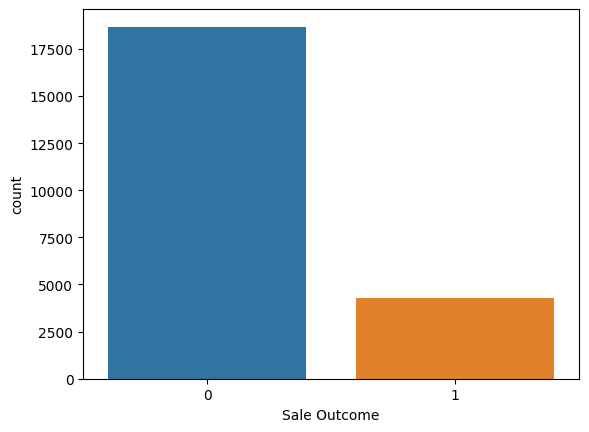

In [9]:
from pandas.io.parsers.readers import annotations
    #create barchats
# Create bar chart
plot = sns.countplot(data=records, x='Sale Outcome')
plt.show()

In [10]:
# Count occurrences of each outcome
outcome_counts = records['Sale Outcome'].value_counts()
print(outcome_counts)

Sale Outcome
0    18677
1     4263
Name: count, dtype: int64


The code provides a visual analysis of factors related to the 'Sale Outcome' in a dataset. Here's a breakdown of each visualization and its purpose:

## Sale Outcome Distribution:

This plot shows the distribution of the 'Sale Outcome' variable, indicating the frequency of 'Sale' and 'No Sale' outcomes.
## Age vs Sale Outcome:

This boxplot compares the distribution of ages between customers who made a sale and those who did not, providing insights into how age may influence the sale outcome.
## Qualification vs Sale Outcome:

This countplot displays the distribution of qualification levels among customers, categorized by their sale outcomes, helping to identify any correlation between education level and sale success.
## Home Mortgage vs Sale Outcome:

This countplot illustrates whether customers with a home mortgage are more likely to make a sale compared to those without, aiding in understanding the impact of home mortgages on sale outcomes.
## Last Contact Direction vs Sale Outcome:

This countplot shows how the direction of the last contact (inbound or outbound) correlates with sale outcomes, revealing whether one contact method is more effective than the other.
## Previous Campaign Outcome vs Sale Outcome:

This countplot examines the relationship between the outcome of previous marketing campaigns and the current sale outcome, indicating if past campaign success influences future sales.
## RBA Cash Rate vs Sale Outcome:

This boxplot visualizes how the RBA cash rate (an economic indicator) varies among customers based on their sale outcomes, helping to understand the impact of economic factors on sales.
## Employment Variation Rate vs Sale Outcome:

This boxplot compares the employment variation rate among customers who made a sale versus those who did not, exploring the influence of employment trends on sale success.
## Consumer Confidence Index vs Sale Outcome:

This boxplot shows the distribution of the consumer confidence index among customers, categorized by their sale outcomes, providing insights into the relationship between consumer sentiment and sales.
Overall, these visualizations offer a comprehensive understanding of how various demographic, economic, and campaign-related factors contribute to sales outcomes in the dataset.

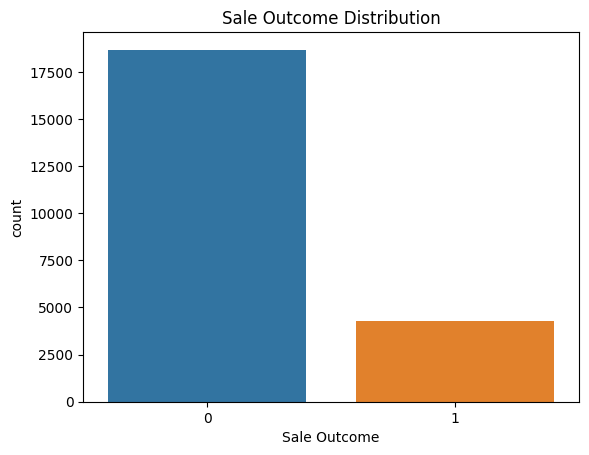

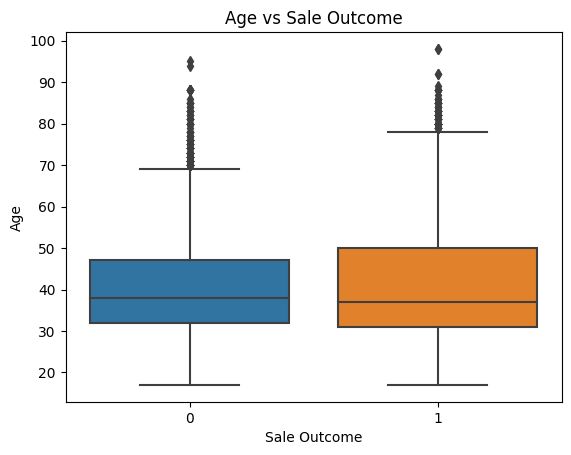

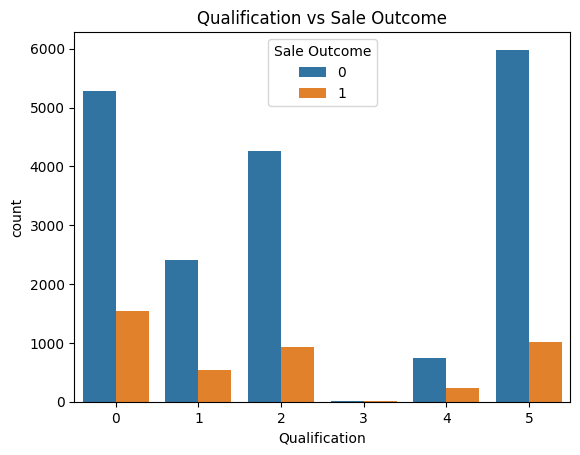

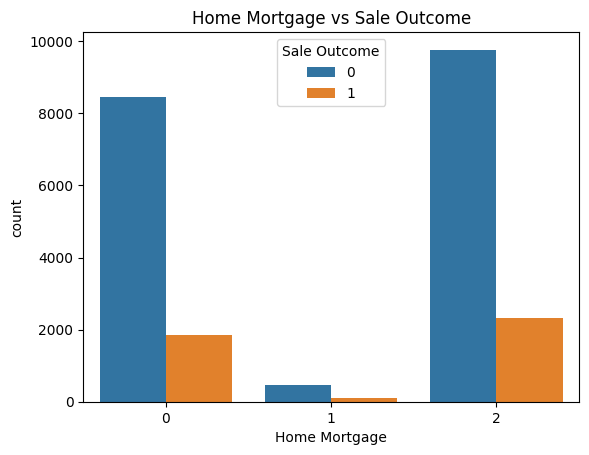

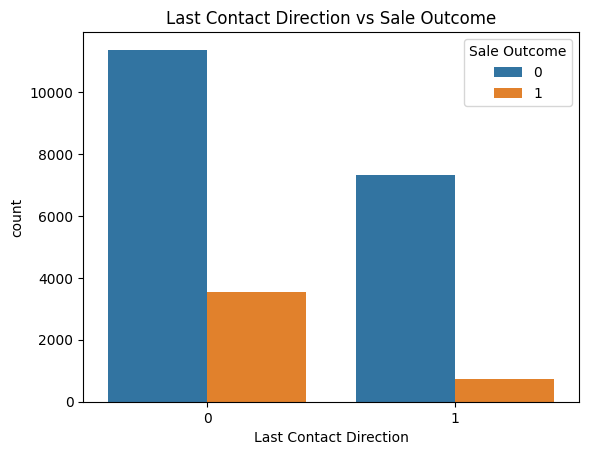

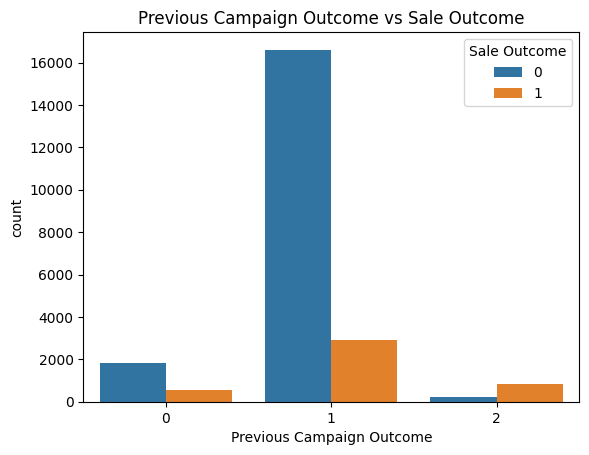

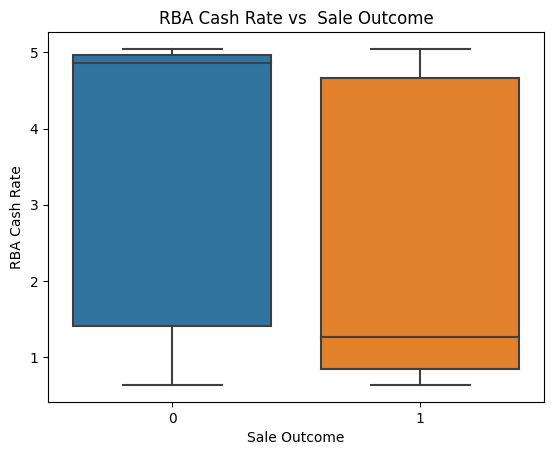

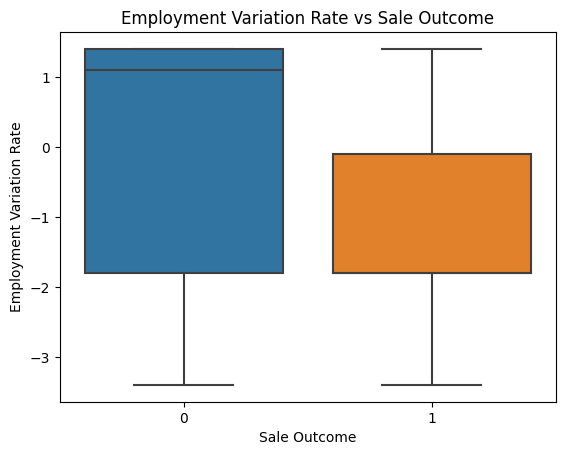

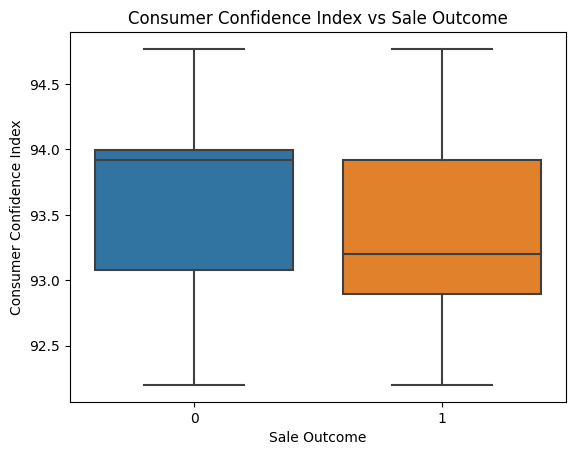

In [89]:
# Sale Outcome distribution
sns.countplot(x='Sale Outcome', data=records)
plt.title('Sale Outcome Distribution')
plt.show()

# Age vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='Age', data=records)
plt.title('Age vs Sale Outcome')
plt.show()

# Qualification vs Sale Outcome
sns.countplot(x='Qualification', hue='Sale Outcome', data=records)
plt.title('Qualification vs Sale Outcome')
plt.show()

# Home Mortgage vs Sale Outcome
sns.countplot(x='Home Mortgage', hue='Sale Outcome', data=records)
plt.title('Home Mortgage vs Sale Outcome')
plt.show()

# Last Contact Direction vs Sale Outcome
sns.countplot(x='Last Contact Direction', hue='Sale Outcome', data=records)
plt.title('Last Contact Direction vs Sale Outcome')
plt.show()

# Previous Campaign Outcome vs Sale Outcome
sns.countplot(x='Previous Campaign Outcome', hue='Sale Outcome', data=records)
plt.title('Previous Campaign Outcome vs Sale Outcome')
plt.show()

# Economic indicators vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='RBA Cash Rate', data=records)
plt.title('RBA Cash Rate vs  Sale Outcome')
plt.show()

sns.boxplot(x='Sale Outcome', y='Employment Variation Rate', data=records)
plt.title('Employment Variation Rate vs Sale Outcome')
plt.show()

sns.boxplot(x='Sale Outcome', y='Consumer Confidence Index', data=records)
plt.title('Consumer Confidence Index vs Sale Outcome')
plt.show()

## Visual Analysis of Sale Outcome Factors

This below code sets up a matplotlib figure with multiple subplots to provide a visual analysis of factors related to the 'Sale Outcome' in a dataset. Each subplot represents a different analysis, including the distribution of sale outcomes, the relationship between age and sale outcomes, the influence of qualification and home mortgage on sale outcomes, the impact of the last contact direction and previous campaign outcomes, and the association between economic indicators (RBA Cash Rate, Employment Variation Rate, Consumer Confidence Index) and sale outcomes. The plots facilitate easy comparison and interpretation of how various demographic, campaign-related, and economic factors affect the likelihood of a successful sale.

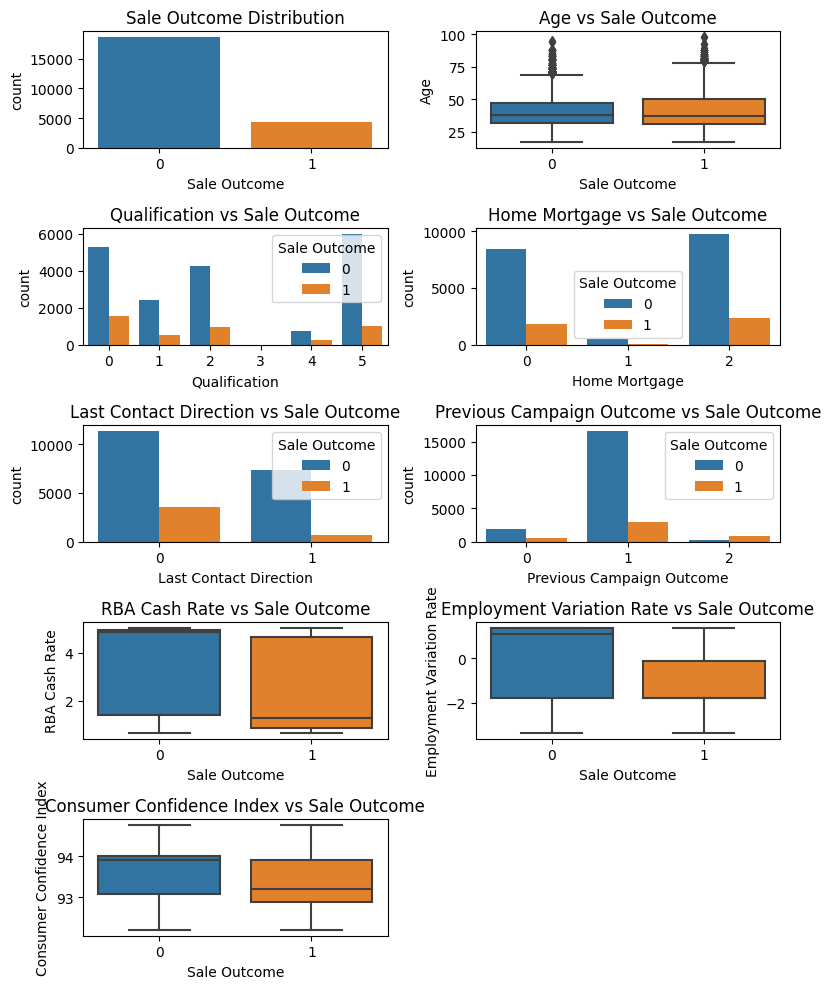

In [90]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))

# Sale Outcome distribution
sns.countplot(x='Sale Outcome', data=records, ax=axes[0, 0])
axes[0, 0].set_title('Sale Outcome Distribution')

# Age vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='Age', data=records, ax=axes[0, 1])
axes[0, 1].set_title('Age vs Sale Outcome')

# Qualification vs Sale Outcome
sns.countplot(x='Qualification', hue='Sale Outcome', data=records, ax=axes[1, 0])
axes[1, 0].set_title('Qualification vs Sale Outcome')

# Home Mortgage vs Sale Outcome
sns.countplot(x='Home Mortgage', hue='Sale Outcome', data=records, ax=axes[1, 1])
axes[1, 1].set_title('Home Mortgage vs Sale Outcome')

# Last Contact Direction vs Sale Outcome
sns.countplot(x='Last Contact Direction', hue='Sale Outcome', data=records, ax=axes[2, 0])
axes[2, 0].set_title('Last Contact Direction vs Sale Outcome')

# Previous Campaign Outcome vs Sale Outcome
sns.countplot(x='Previous Campaign Outcome', hue='Sale Outcome', data=records, ax=axes[2, 1])
axes[2, 1].set_title('Previous Campaign Outcome vs Sale Outcome')

# RBA Cash Rate vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='RBA Cash Rate', data=records, ax=axes[3, 0])
axes[3, 0].set_title('RBA Cash Rate vs Sale Outcome')

# Employment Variation Rate vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='Employment Variation Rate', data=records, ax=axes[3, 1])
axes[3, 1].set_title('Employment Variation Rate vs Sale Outcome')

# Consumer Confidence Index vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='Consumer Confidence Index', data=records, ax=axes[4, 0])
axes[4, 0].set_title('Consumer Confidence Index vs Sale Outcome')

# Hide the last unused subplot (axes[4, 1])
fig.delaxes(axes[4, 1])

plt.tight_layout()
plt.show()

# Questions to address from GOBank.csv Dataset

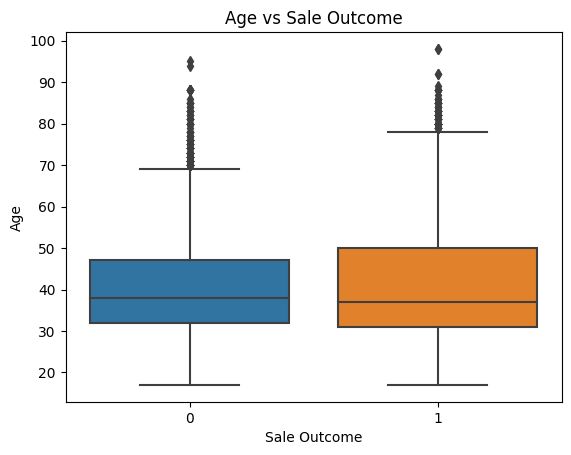

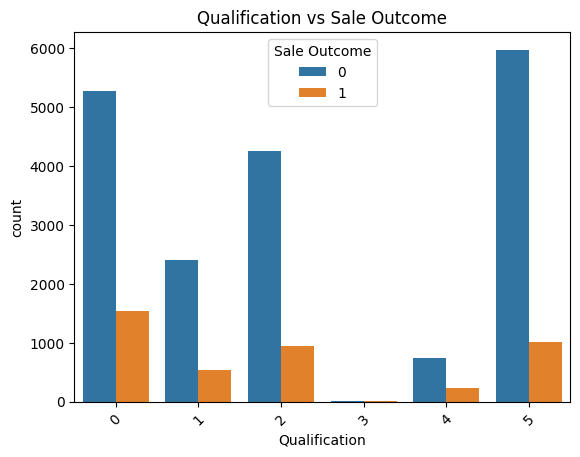

In [91]:
# 1. Demographic details influence on sales outcomes
# Age vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='Age', data=records)
plt.title('Age vs Sale Outcome')
plt.show()

# Qualification vs Sale Outcome
sns.countplot(x='Qualification', hue='Sale Outcome', data=records)
plt.title('Qualification vs Sale Outcome')
plt.xticks(rotation=45)
plt.show()



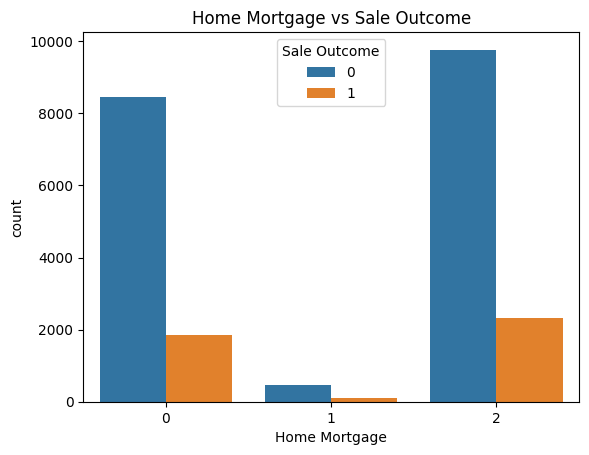

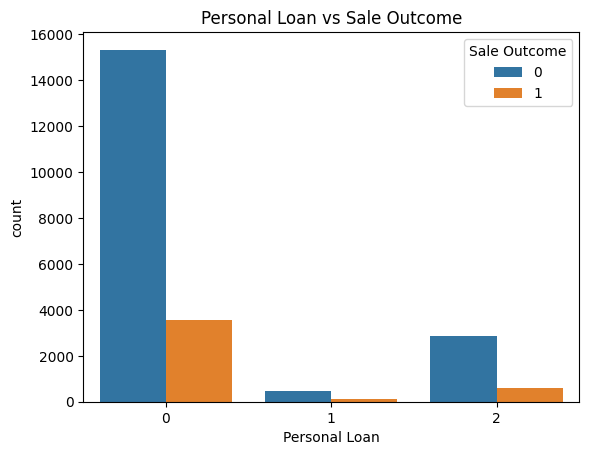

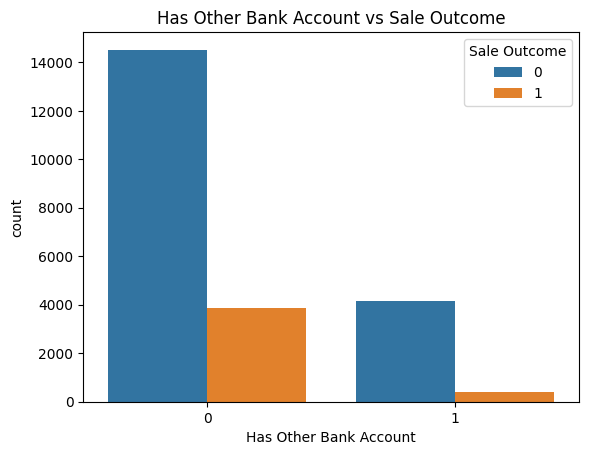

In [92]:

# 2. Influence of having different types of accounts on Sale Outcome
# Home Mortgage vs Sale Outcome
sns.countplot(x='Home Mortgage', hue='Sale Outcome', data=records)
plt.title('Home Mortgage vs Sale Outcome')
plt.show()

# Personal Loan vs Sale Outcome
sns.countplot(x='Personal Loan', hue='Sale Outcome', data=records)
plt.title('Personal Loan vs Sale Outcome')
plt.show()

# Has Other Bank Account vs Sale Outcome
sns.countplot(x='Has Other Bank Account', hue='Sale Outcome', data=records)
plt.title('Has Other Bank Account vs Sale Outcome')
plt.show()




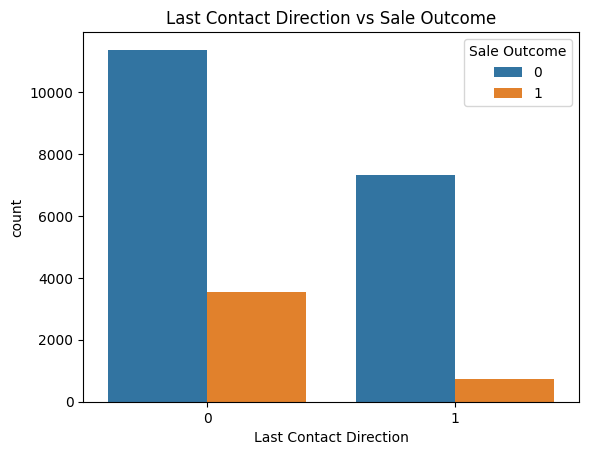

In [93]:
# 3. Influence of last contact method on Sale Outcome
sns.countplot(x='Last Contact Direction', hue='Sale Outcome', data=records)
plt.title('Last Contact Direction vs Sale Outcome')
plt.show()



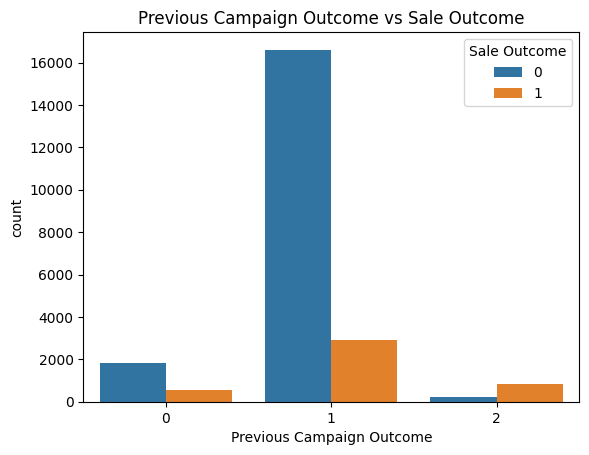

In [94]:
# 4. Influence of previous campaign outcome on Sale Outcome
sns.countplot(x='Previous Campaign Outcome', hue='Sale Outcome', data=records)
plt.title('Previous Campaign Outcome vs Sale Outcome')
plt.show()



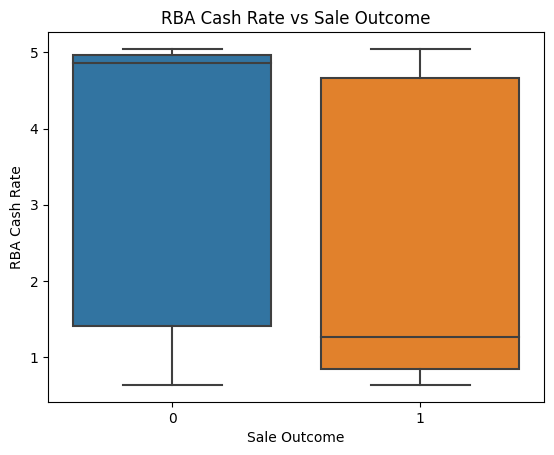

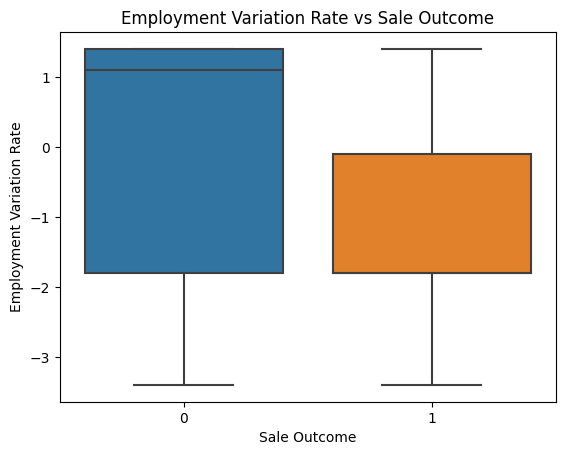

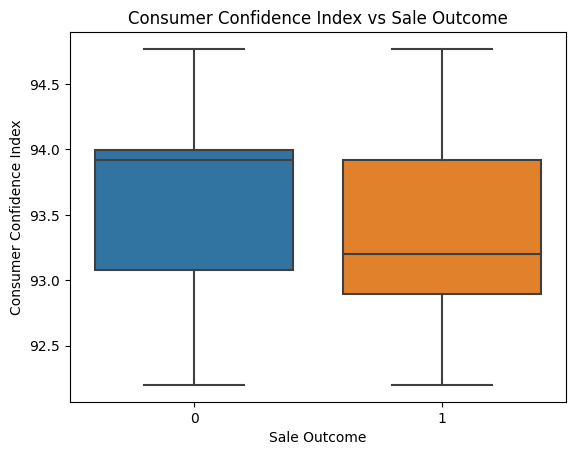

In [96]:
# 5. Impact of economic indicators on Sale Outcomes
# RBA Cash Rate vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='RBA Cash Rate', data=records)
plt.title('RBA Cash Rate vs Sale Outcome')
plt.show()

# Employment Variation Rate vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='Employment Variation Rate', data=records)
plt.title('Employment Variation Rate vs Sale Outcome')
plt.show()

# Consumer Confidence Index vs Sale Outcome
sns.boxplot(x='Sale Outcome', y='Consumer Confidence Index', data=records)
plt.title('Consumer Confidence Index vs Sale Outcome')
plt.show()

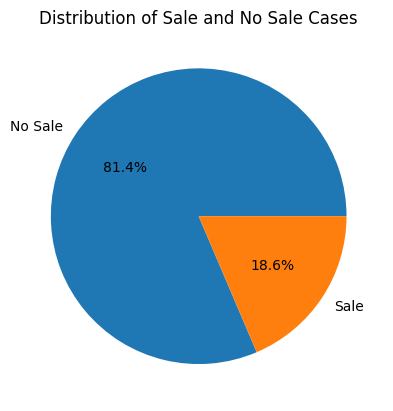

In [11]:

# Let's generate a pie chart with the distribution of sale and no-sale cases, along with percentage labels.
outcome_labels = ['No Sale', 'Sale']
plt.pie(outcome_counts, labels=outcome_labels, autopct='%1.1f%%')
plt.title('Distribution of Sale and No Sale Cases')
plt.show()


**Explore numeric variables**

In [12]:
##Write your code to view descriptive stats of numeric variables; hint: use describe()
records.describe()

,Age,Qualification,Occupation,Marital Status,Home Mortgage,Personal Loan,Has Other Bank Account,Last Contact Direction,Last Contact Duration,Last Contact Month,Last Contact Weekday,Number of Current Campaign Calls,Number of Previous Campaign Calls,Previous Campaign Outcome,RBA Cash Rate,Employment Variation Rate,Consumer Confidence Index,Sale Outcome
count,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000,22940.000000
mean,40.097602,2.279119,4.219355,1.459634,1.078553,0.329381,0.198867,0.350305,282.378657,4.232389,2.013514,2.542938,0.199441,0.942153,3.495762,-0.027541,93.557365,0.185833
std,10.799192,2.038406,3.701798,1.020040,0.984390,0.724876,0.399156,0.477076,285.288360,2.353499,1.396935,2.702480,0.543041,0.382621,1.785776,1.619152,0.592104,0.388980
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.634000,-3.400000,92.201000,0.000000
25%,32.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,108.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1.313000,-1.800000,93.075000,0.000000
50%,38.000000,2.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,193.000000,4.000000,2.000000,2.000000,0.000000,1.000000,4.857000,1.100000,93.444000,0.000000
75%,47.000000,5.000000,7.000000,3.000000,2.000000,0.000000,0.000000,1.000000,348.000000,6.000000,3.000000,3.000000,0.000000,1.000000,4.961000,1.400000,93.994000,0.000000
max,98.000000,5.000000,11.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4918.000000,9.000000,4.000000,56.000000,6.000000,2.000000,5.045000,1.400000,94.767000,1.000000


See the above outcome: note the range across variables;
note mean and std, note mean and median, IQR.. for each numeric variable,

Age :

count    22940.000000
mean        40.097602
std         10.799192
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: Age, dtype: float64




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


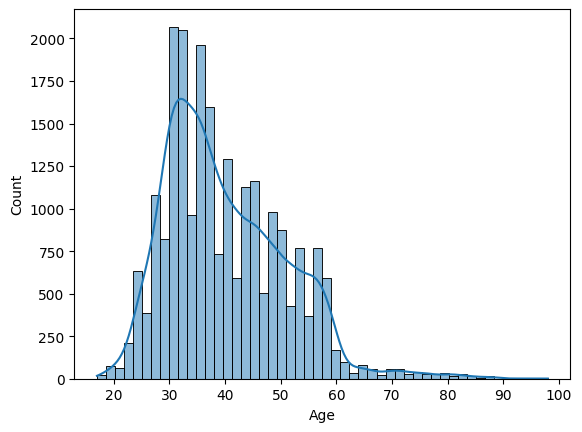

Home Mortgage :

count    22940.000000
mean         1.078553
std          0.984390
min          0.000000
25%          0.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Home Mortgage, dtype: float64




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


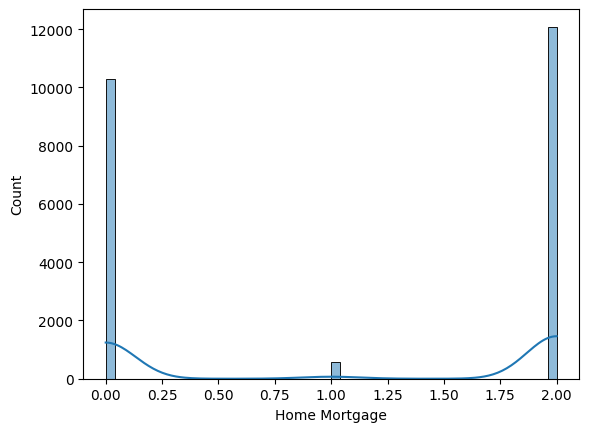

Last Contact Duration :

count    22940.000000
mean       282.378657
std        285.288360
min          0.000000
25%        108.000000
50%        193.000000
75%        348.000000
max       4918.000000
Name: Last Contact Duration, dtype: float64




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


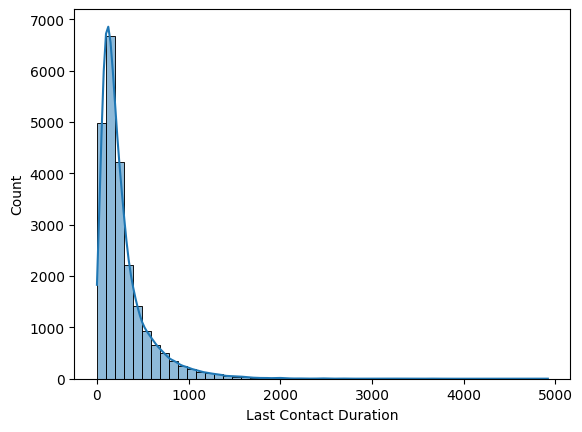

Number of Current Campaign Calls :

count    22940.000000
mean         2.542938
std          2.702480
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: Number of Current Campaign Calls, dtype: float64




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


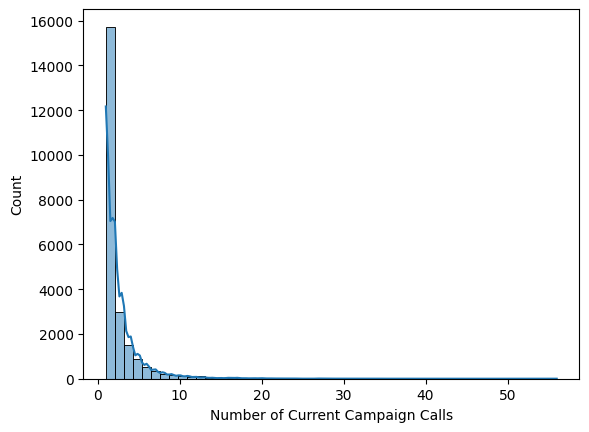

Number of Previous Campaign Calls :

count    22940.000000
mean         0.199441
std          0.543041
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: Number of Previous Campaign Calls, dtype: float64




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


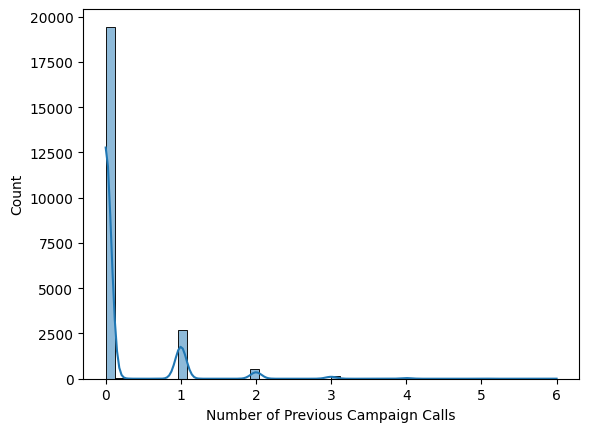

RBA Cash Rate :

count    22940.000000
mean         3.495762
std          1.785776
min          0.634000
25%          1.313000
50%          4.857000
75%          4.961000
max          5.045000
Name: RBA Cash Rate, dtype: float64




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


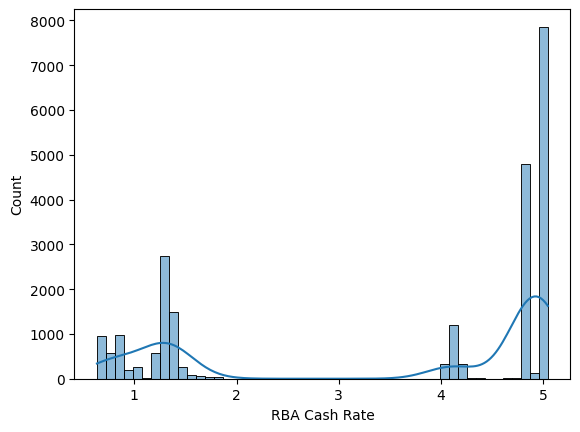

Employment Variation Rate :

count    22940.000000
mean        -0.027541
std          1.619152
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: Employment Variation Rate, dtype: float64




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


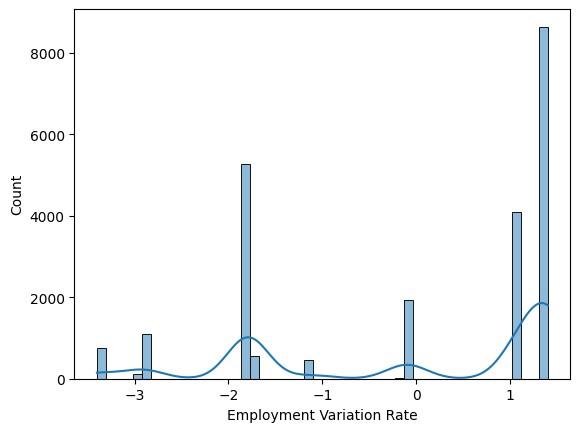

Consumer Confidence Index :

count    22940.000000
mean        93.557365
std          0.592104
min         92.201000
25%         93.075000
50%         93.444000
75%         93.994000
max         94.767000
Name: Consumer Confidence Index, dtype: float64




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


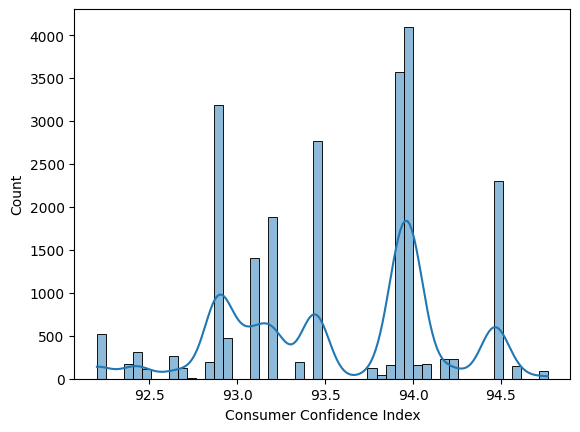

In [13]:
#Let's create both descriptive stats and histograms for numeric variables, try to list variables in order easy to comprehend: personal, history, clinical
# Define the numeric variables in order of personal, history, clinical
nums = ['Age', 'Home Mortgage', 'Last Contact Duration', 'Number of Current Campaign Calls', 
        'Number of Previous Campaign Calls', 'RBA Cash Rate', 'Employment Variation Rate', 'Consumer Confidence Index']

# Iterate over each numeric variable
for i in nums:
    print(i, ':\n')
    print(records[i].describe())
    print('\n')
    sns.histplot(data=records, x=i, bins=50, kde=True)
    plt.show()

Age :

count    22940.000000
mean        40.097602
std         10.799192
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: Age, dtype: float64




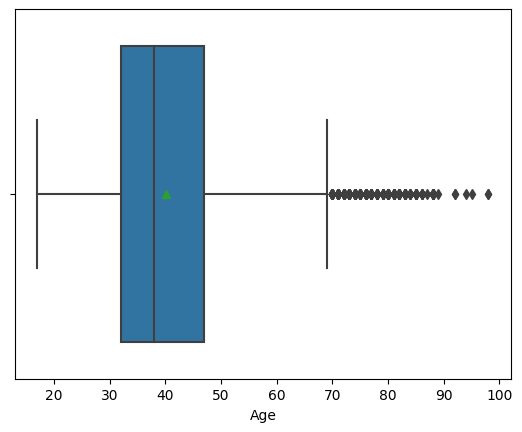

Home Mortgage :

count    22940.000000
mean         1.078553
std          0.984390
min          0.000000
25%          0.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Home Mortgage, dtype: float64




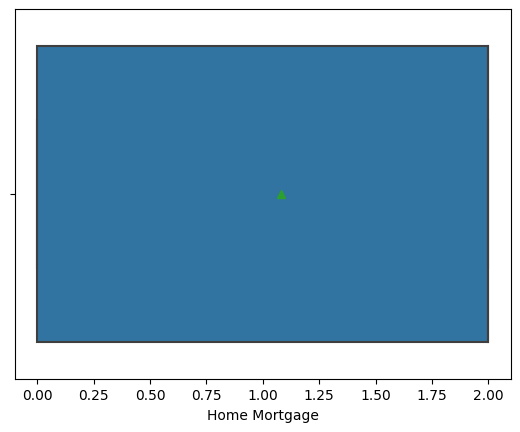

Last Contact Duration :

count    22940.000000
mean       282.378657
std        285.288360
min          0.000000
25%        108.000000
50%        193.000000
75%        348.000000
max       4918.000000
Name: Last Contact Duration, dtype: float64




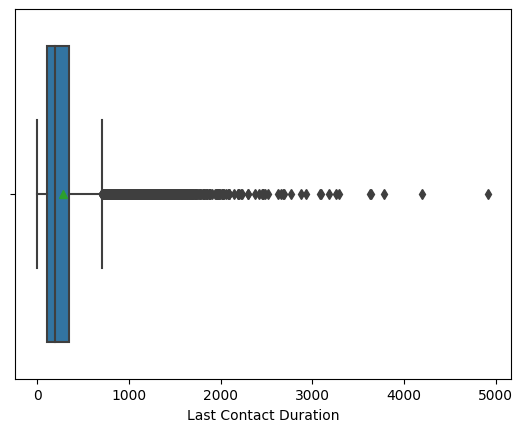

Number of Current Campaign Calls :

count    22940.000000
mean         2.542938
std          2.702480
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: Number of Current Campaign Calls, dtype: float64




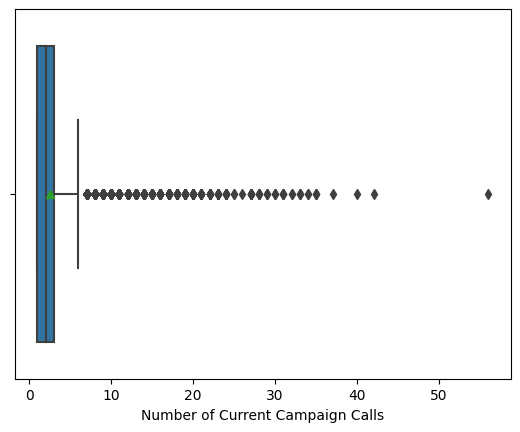

Number of Previous Campaign Calls :

count    22940.000000
mean         0.199441
std          0.543041
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: Number of Previous Campaign Calls, dtype: float64




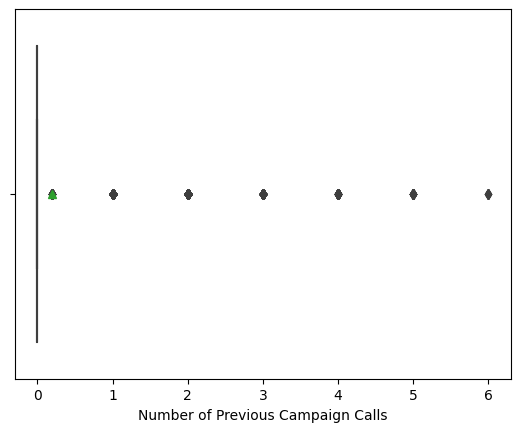

RBA Cash Rate :

count    22940.000000
mean         3.495762
std          1.785776
min          0.634000
25%          1.313000
50%          4.857000
75%          4.961000
max          5.045000
Name: RBA Cash Rate, dtype: float64




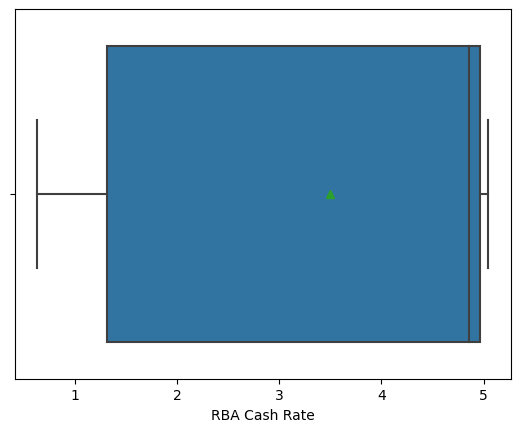

Employment Variation Rate :

count    22940.000000
mean        -0.027541
std          1.619152
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: Employment Variation Rate, dtype: float64




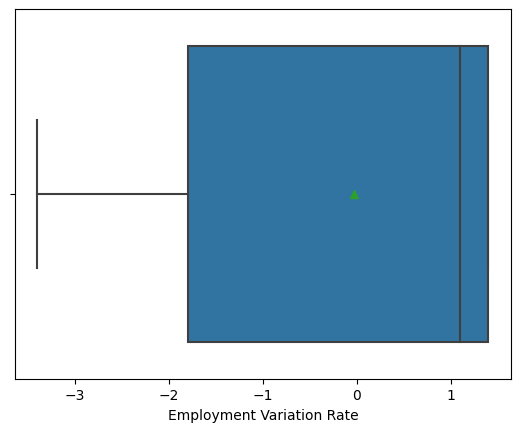

Consumer Confidence Index :

count    22940.000000
mean        93.557365
std          0.592104
min         92.201000
25%         93.075000
50%         93.444000
75%         93.994000
max         94.767000
Name: Consumer Confidence Index, dtype: float64




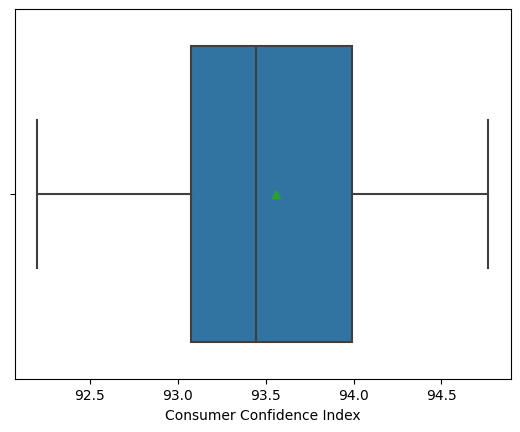

In [14]:
# Define the numeric variables
nums = ['Age', 'Home Mortgage', 'Last Contact Duration', 'Number of Current Campaign Calls', 
        'Number of Previous Campaign Calls', 'RBA Cash Rate', 'Employment Variation Rate', 'Consumer Confidence Index']

# Iterate over each numeric variable
for i in nums:
    print(i, ':\n')
    print(records[i].describe())
    print('\n')
    sns.boxplot(data=records, x=i, showmeans=True)
    plt.show()

**Feature engineering: More on data conversion**

Sometimes, you need both analytical and creative skills to transform data into variables that can provide valuable insights. For instance, if you meet with  experts in gestational diabetes and you'd like to understand the impact of having no children, one child, or multiple children on the incidence of diabetes, you can create a new variable called "Child_Category."

In [15]:
# Create the 'Child_Category' column based on the 'Age' column
def categorize_age(age):
    if age < 20:
        return 'Young'
    elif 20 <= age < 40:
        return 'Middle-aged'
    else:
        return 'Old'

records['Age_Category'] = records['Age'].apply(categorize_age)


In [16]:
# We also want a numeric version
def categorize_age_numeric(age):
    if age < 20:
        return 0
    elif 20 <= age < 40:
        return 1
    else:
        return 2

records['Age_Category_Numeric'] = records['Age'].apply(categorize_age_numeric)


In [17]:
records

,CustomerID,Age,Qualification,Occupation,Marital Status,Home Mortgage,Personal Loan,Has Other Bank Account,Last Contact Direction,Last Contact Duration,...,Last Contact Weekday,Number of Current Campaign Calls,Number of Previous Campaign Calls,Previous Campaign Outcome,RBA Cash Rate,Employment Variation Rate,Consumer Confidence Index,Sale Outcome,Age_Category,Age_Category_Numeric
0,CU318939,32,1,10,1,2,0,0,0,172.000000,...,4,2,0.0,1,4.963,1.4,93.918,0,Middle-aged,1
1,CU935403,39,0,0,1,0,0,0,1,744.000000,...,1,6,0.0,1,4.857,1.1,93.994,1,Middle-aged,1
2,CU792919,36,1,10,0,0,0,0,0,31.000000,...,2,1,0.0,1,1.327,-1.8,92.893,0,Middle-aged,1
3,CU168904,44,5,4,1,2,0,0,0,102.000000,...,2,1,0.0,1,1.327,-1.8,92.893,0,Old,2
4,CU442580,38,1,10,1,0,0,0,1,436.000000,...,2,1,0.0,1,4.860,1.1,93.994,0,Middle-aged,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22935,CU214113,29,2,10,3,0,0,1,0,921.000000,...,4,3,0.0,1,4.964,1.4,93.444,1,Middle-aged,1
22936,CU695549,83,4,7,1,2,0,0,0,75.000000,...,1,2,0.0,1,0.771,-3.4,92.379,0,Old,2
22937,CU860353,29,5,5,0,2,0,0,0,282.378657,...,3,1,0.0,1,1.262,-2.9,92.963,0,Middle-aged,1
22938,CU922425,46,0,8,1,0,2,0,0,1220.000000,...,3,12,0.0,1,4.961,1.4,93.918,0,Old,2


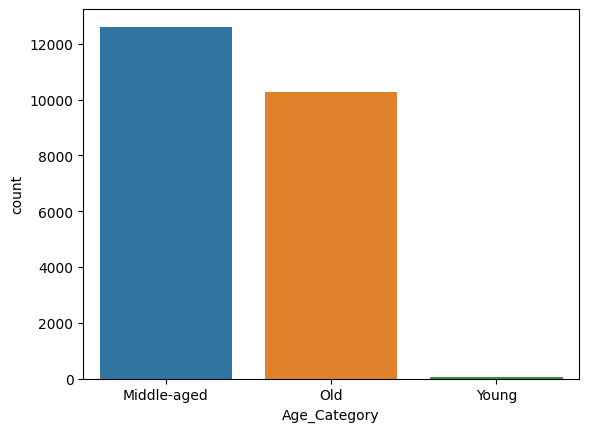

In [18]:
sns.countplot(data=records, x='Age_Category')
plt.show()


In [19]:
age_counts = records['Age_Category'].value_counts()
print(age_counts)


Age_Category
Middle-aged    12612
Old            10274
Young             54
Name: count, dtype: int64


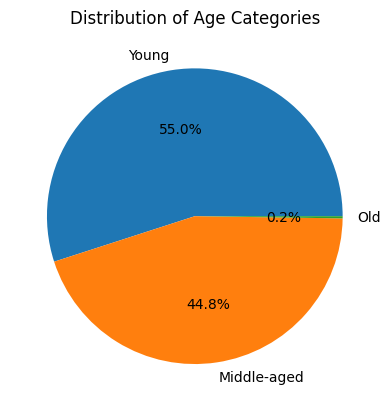

In [20]:
# Assuming you have already calculated 'age_counts' using value_counts()
age_labels = ['Young', 'Middle-aged', 'Old']
plt.pie(age_counts, labels=age_labels, autopct='%1.1f%%')
plt.title('Distribution of Age Categories')
plt.show()


**Explore bivariable relationships between each numeric variable against the categorical target**

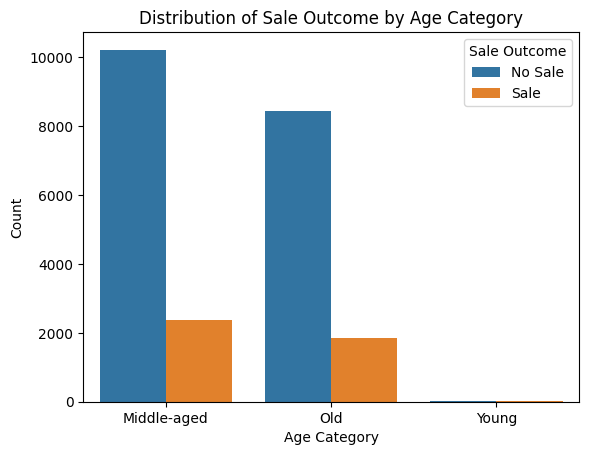

In [21]:
# Examine the relationship between Sale Outcome and Age_Category
sns.countplot(data=records, hue='Sale Outcome', x='Age_Category')

# Add labels
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Sale Outcome by Age Category')
plt.legend(title='Sale Outcome', labels=['No Sale', 'Sale'])

plt.show()


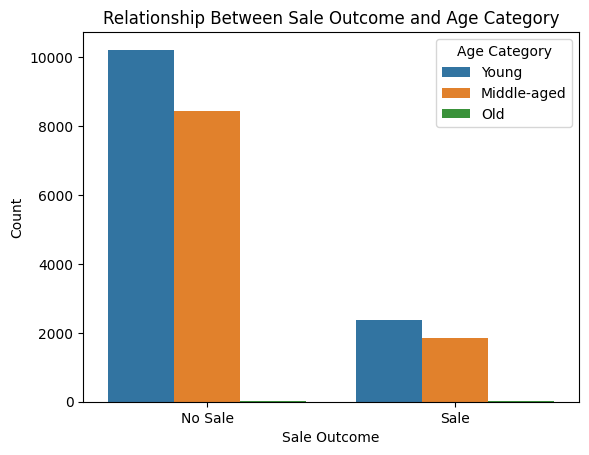

In [22]:
# Examine the relationship between Sale Outcome and Age_Category
sns.countplot(data=records, x='Sale Outcome', hue='Age_Category')

# Add labels and title
plt.xlabel('Sale Outcome')
plt.ylabel('Count')
plt.title('Relationship Between Sale Outcome and Age Category')

# Customise legend and x-axis tick labels
plt.legend(title='Age Category', labels=['Young', 'Middle-aged', 'Old'])
plt.xticks(ticks=[0, 1], labels=['No Sale', 'Sale'])

# Show the plot
plt.show()


In a banking context, factors such as customer demographics, financial behaviors, economic conditions, and product offerings could influence both the number of children a customer has and their likelihood of having certain financial products or behaviors, including personal loans or mortgages

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


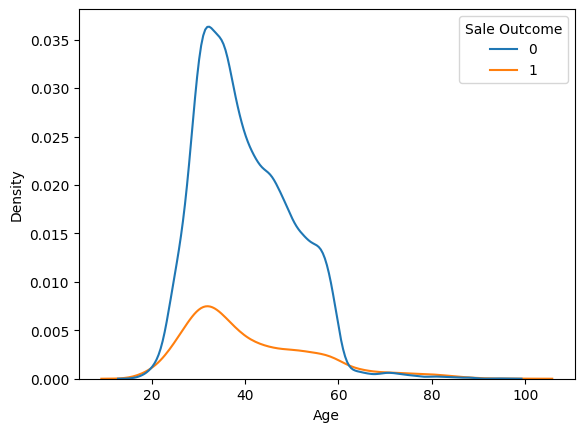

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


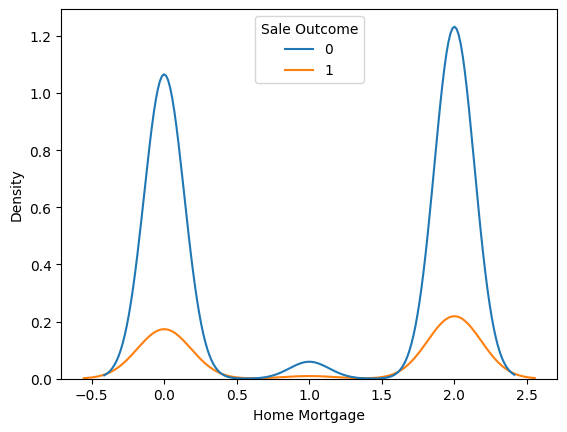

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


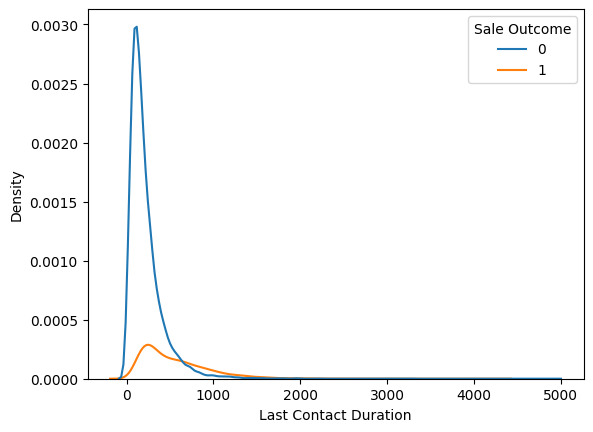

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


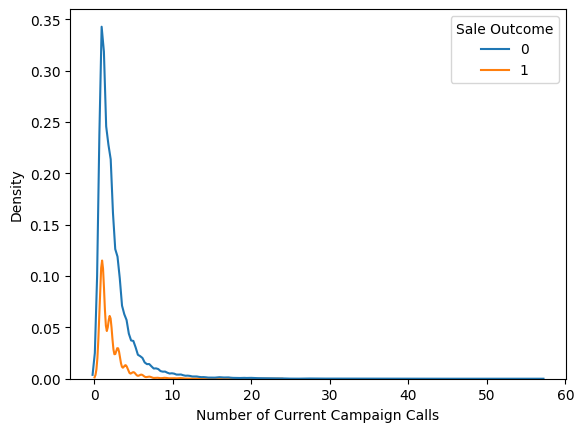

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


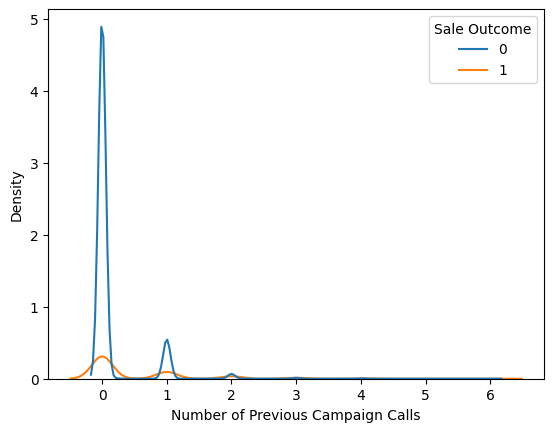

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


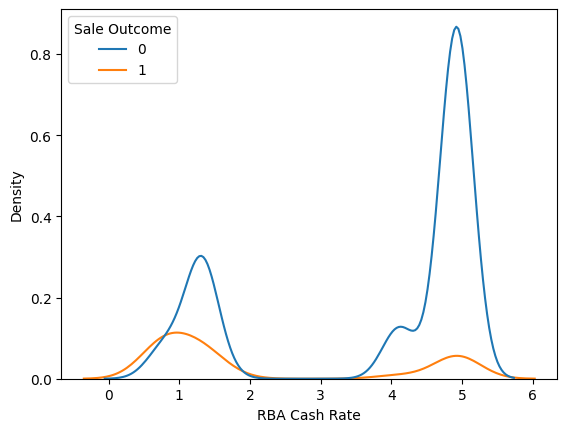

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


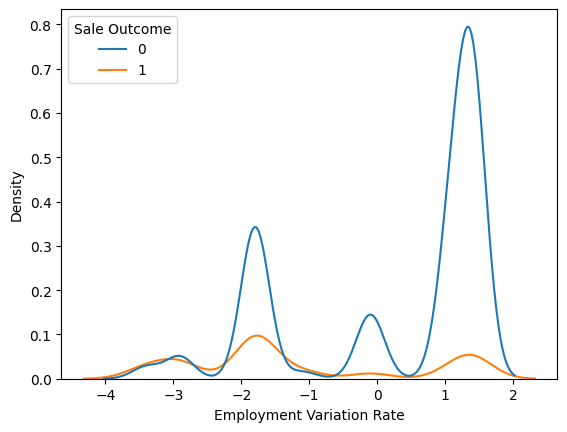

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


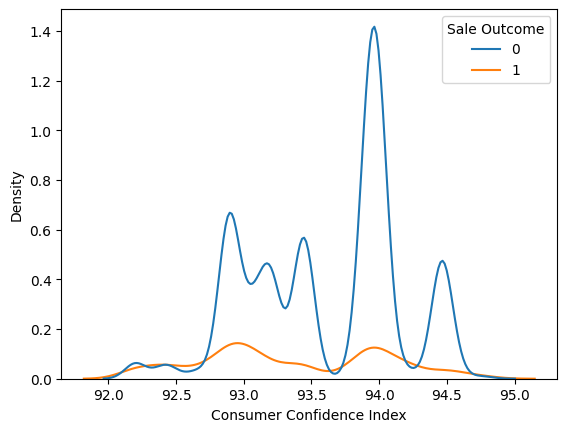

In [23]:
# Reuse the code above and break the distribution by the target
for i in nums:
    sns.kdeplot(data=records, x=i, hue='Sale Outcome')
    plt.show()


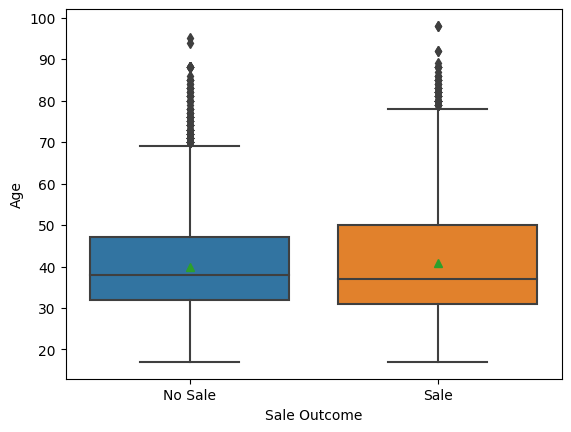

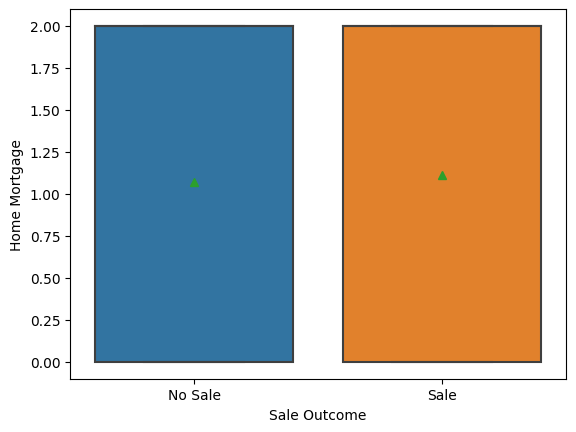

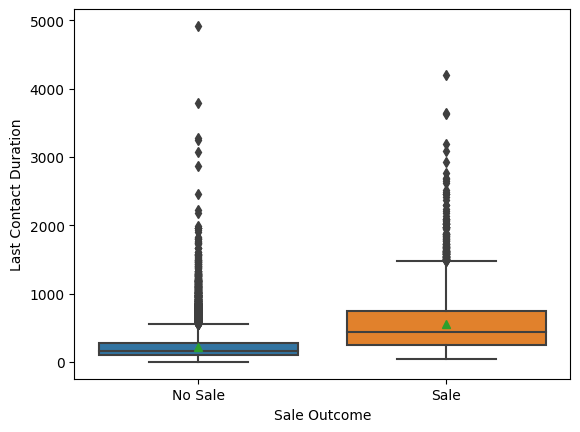

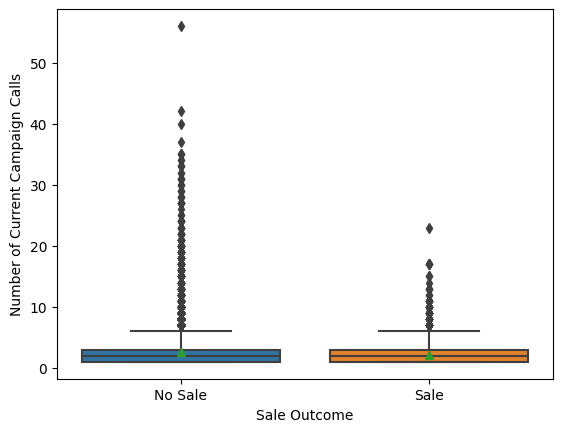

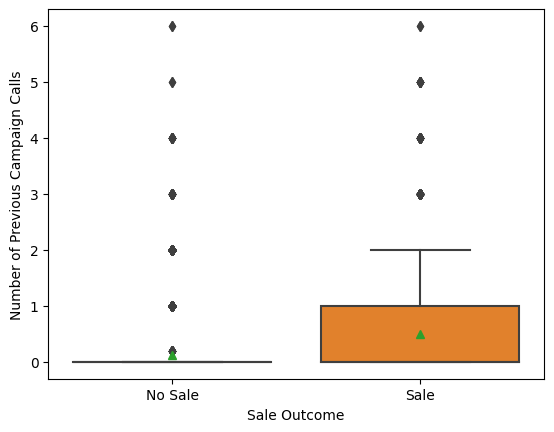

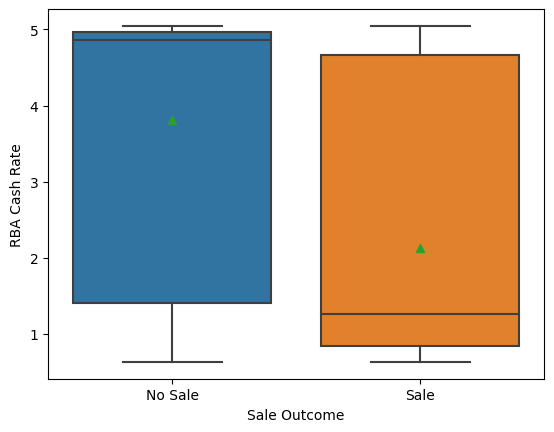

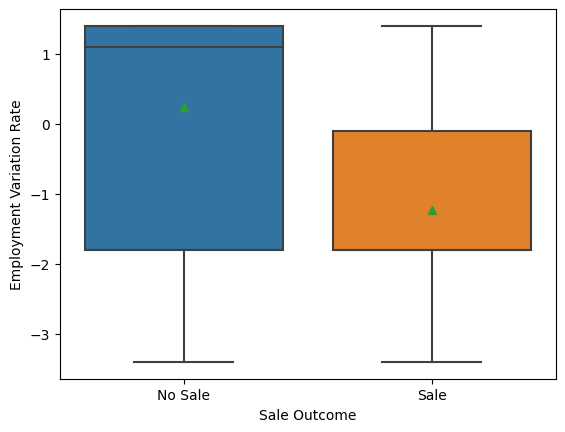

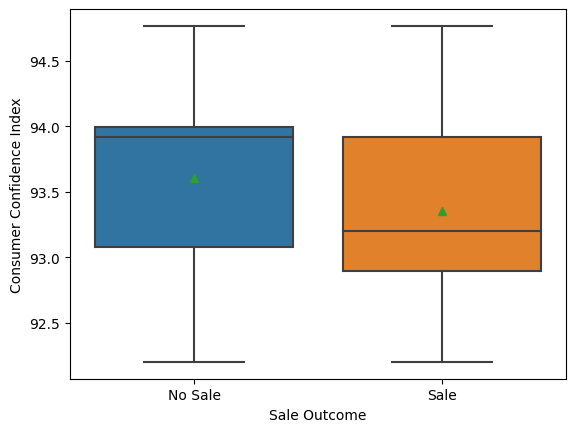

In [24]:
# Reuse the code above and break the distribution by the target
for i in nums:
    sns.boxplot(data=records, y=i, showmeans=True, x='Sale Outcome')
    # Label x-ticks
    plt.xticks([0, 1], ['No Sale', 'Sale'])
    plt.show()


You may need to perform more bivariate and multivariable analyses depending on the datasets given to you, and domain expertise available. You may need to read previous reports/papers to inform your EDA.

**Multivariate analysis**

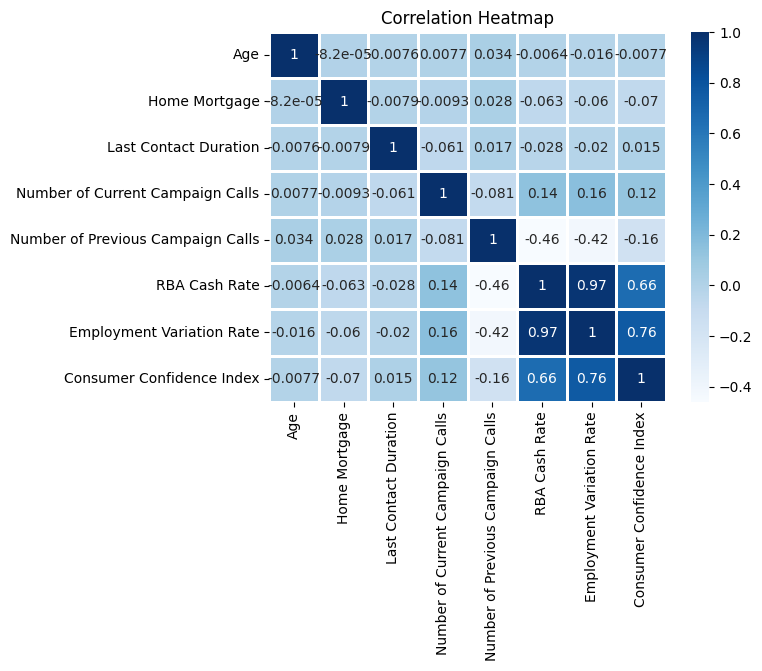

In [25]:
# Visualize heatmap
sns.heatmap(data=records[nums].corr(), cmap="Blues", linewidths=.9, annot=True)
plt.title('Correlation Heatmap')
plt.show()

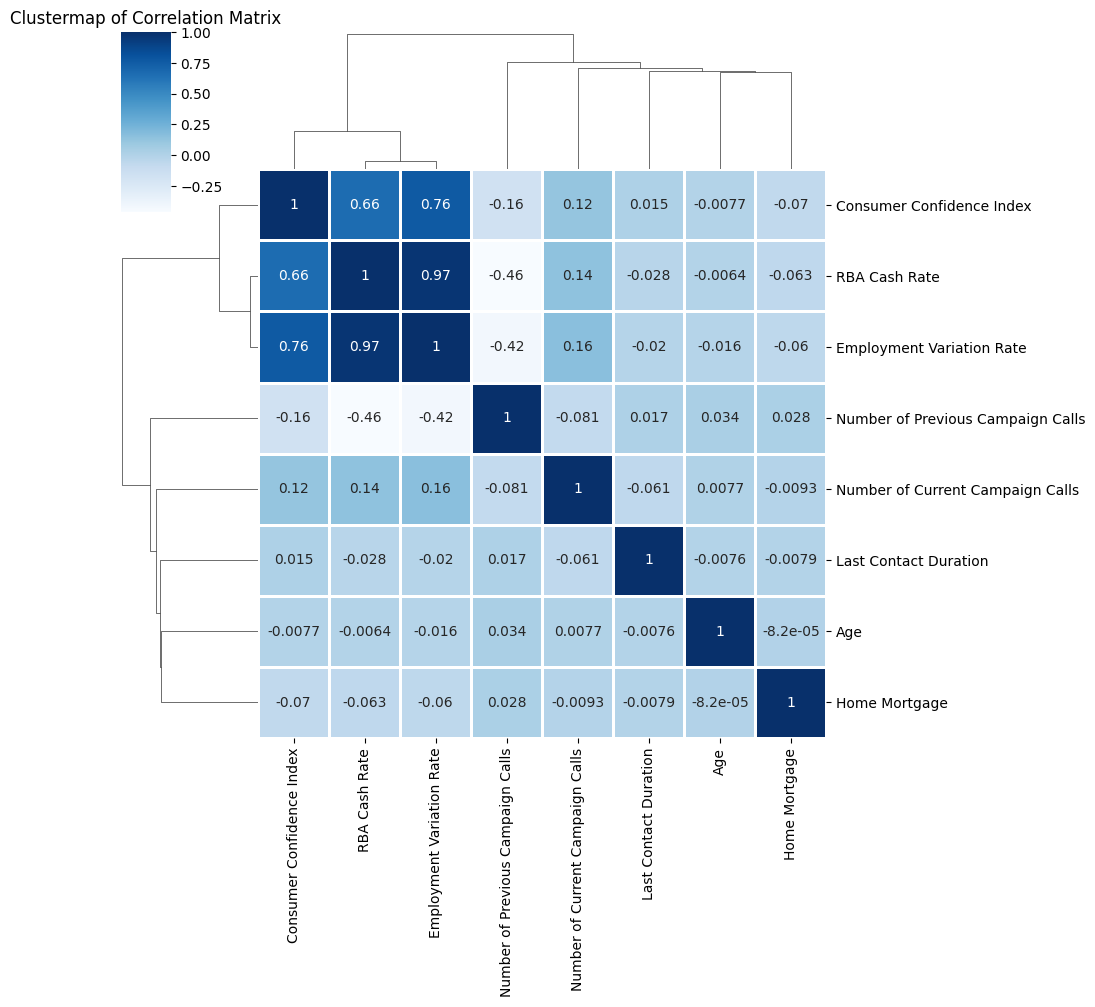

In [26]:
# Visualize clustermap
sns.clustermap(data=records[nums].corr(), cmap="Blues", linewidths=.9, annot=True)
plt.title('Clustermap of Correlation Matrix')
plt.show()

### **Data preparation**
* Data conversion
* Feature selection
* Target specification
* Data spliting
* Data scaling (X_train and X-test)

####**Select features and target specification**


In [27]:
# Define the predictors
features = ['Age', 'Home Mortgage', 'Last Contact Duration', 'Number of Current Campaign Calls', 
            'Number of Previous Campaign Calls', 'RBA Cash Rate', 'Employment Variation Rate', 'Consumer Confidence Index']
X = records[features]

# Define the label
y = records['Sale Outcome']

print(X.head())
print(y.head())


   Age  Home Mortgage  Last Contact Duration  \
0   32              2                  172.0   
1   39              0                  744.0   
2   36              0                   31.0   
3   44              2                  102.0   
4   38              0                  436.0   

   Number of Current Campaign Calls  Number of Previous Campaign Calls  \
0                                 2                                0.0   
1                                 6                                0.0   
2                                 1                                0.0   
3                                 1                                0.0   
4                                 1                                0.0   

   RBA Cash Rate  Employment Variation Rate  Consumer Confidence Index  
0          4.963                        1.4                     93.918  
1          4.857                        1.1                     93.994  
2          1.327                       -1.8    

You can use Pregnancies as a feature. We want to show you how to scale some features, hence we include Child_Category_Numeric instead.

Sometime we scale only some features while keeping others unscaled. This is a common practice in machine learning when you want to maintain the interpretability of certain variables while optimizing others for model performance.

In many machine learning algorithms, especially those that rely on distance metrics like k-NN, or optimization algorithms like gradient descent in neural networks, feature scaling is essential for the model to perform well. However, some variables, like categorical ones or those that are already on a similar scale, might not need to be scaled.

####**Splitting and Scaling the feature data**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [30]:
# Features to scale
features_to_scale = records[['Age', 'Home Mortgage', 'Last Contact Duration', 'Number of Current Campaign Calls', 
                     'Number of Previous Campaign Calls', 'RBA Cash Rate', 'Employment Variation Rate', 
                     'Consumer Confidence Index']]

# Features to keep
features_to_keep = records['Sale Outcome']


In [31]:
print(features_to_scale)
print(features_to_keep)

       Age  Home Mortgage  Last Contact Duration  \
0       32              2             172.000000   
1       39              0             744.000000   
2       36              0              31.000000   
3       44              2             102.000000   
4       38              0             436.000000   
...    ...            ...                    ...   
22935   29              0             921.000000   
22936   83              2              75.000000   
22937   29              2             282.378657   
22938   46              0            1220.000000   
22939   35              2             236.000000   

       Number of Current Campaign Calls  Number of Previous Campaign Calls  \
0                                     2                                0.0   
1                                     6                                0.0   
2                                     1                                0.0   
3                                     1                        

In [32]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler(clip=True)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define the predictors
features = ['Age', 'Home Mortgage', 'Last Contact Duration', 'Number of Current Campaign Calls', 
            'Number of Previous Campaign Calls', 'RBA Cash Rate', 'Employment Variation Rate', 
            'Consumer Confidence Index']
X = records[features]

# Define the label
y = records['Sale Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Features to scale
features_to_scale = ['Age', 'Home Mortgage', 'Last Contact Duration', 
                     'Number of Current Campaign Calls', 'Number of Previous Campaign Calls', 
                     'RBA Cash Rate', 'Employment Variation Rate', 'Consumer Confidence Index']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the features to scale on the training data
X_train_scaled_values = scaler.fit_transform(X_train[features_to_scale])
# Transform the features to scale on the test data
X_test_scaled_values = scaler.transform(X_test[features_to_scale])

# Create DataFrames from the scaled values
X_train_scaled = pd.DataFrame(X_train_scaled_values, columns=features_to_scale)
X_test_scaled = pd.DataFrame(X_test_scaled_values, columns=features_to_scale)

# Add 'Sale Outcome' column to the scaled DataFrames
X_train_scaled['Sale Outcome'] = y_train.reset_index(drop=True)
X_test_scaled['Sale Outcome'] = y_test.reset_index(drop=True)


Note in the above code we use the same scaler learned from X_train to transform the X_test. To ensure the range we can use scaler = MinMaxScaler(clip=True). Be aware of potential information loss if the X_test has values outside the Min and Max of X_train.

If we don't use clip-True, we may have scaled values outside [0,1] but we avoid information loss.

In [34]:
X_train_scaled

,Age,Home Mortgage,Last Contact Duration,Number of Current Campaign Calls,Number of Previous Campaign Calls,RBA Cash Rate,Employment Variation Rate,Consumer Confidence Index,Sale Outcome
0,0.209877,0.0,0.033754,0.072727,0.166667,0.148946,0.333333,0.269680,0
1,0.148148,1.0,0.002033,0.163636,0.000000,0.143278,0.333333,0.269680,0
2,0.518519,1.0,0.025417,0.018182,0.000000,0.957833,0.937500,0.698753,0
3,0.209877,1.0,0.041684,0.072727,0.000000,0.980503,1.000000,0.882307,0
4,0.148148,1.0,0.027044,0.000000,0.166667,0.143278,0.333333,0.269680,0
...,...,...,...,...,...,...,...,...,...
18347,0.209877,0.0,0.030907,0.018182,0.000000,0.055543,0.479167,0.778644,0
18348,0.382716,0.0,0.003863,0.000000,0.000000,0.957153,0.937500,0.698753,0
18349,0.222222,0.0,0.021147,0.000000,0.000000,0.958059,0.937500,0.698753,0
18350,0.382716,0.0,0.133591,0.000000,0.166667,0.015869,0.354167,0.722525,1


## Logistic Regression Machine Learning Model
We'll use Logistic Regression to predict 'Sale' or 'No Sale'.

In [98]:
records.head()

,CustomerID,Age,Qualification,Occupation,Marital Status,Home Mortgage,Personal Loan,Has Other Bank Account,Last Contact Direction,Last Contact Duration,...,Last Contact Weekday,Number of Current Campaign Calls,Number of Previous Campaign Calls,Previous Campaign Outcome,RBA Cash Rate,Employment Variation Rate,Consumer Confidence Index,Sale Outcome,Age_Category,Age_Category_Numeric
0,CU318939,32,1,10,1,2,0,0,0,172.0,...,4,2,0.0,1,4.963,1.4,93.918,0,Middle-aged,1
1,CU935403,39,0,0,1,0,0,0,1,744.0,...,1,6,0.0,1,4.857,1.1,93.994,1,Middle-aged,1
2,CU792919,36,1,10,0,0,0,0,0,31.0,...,2,1,0.0,1,1.327,-1.8,92.893,0,Middle-aged,1
3,CU168904,44,5,4,1,2,0,0,0,102.0,...,2,1,0.0,1,1.327,-1.8,92.893,0,Old,2
4,CU442580,38,1,10,1,0,0,0,1,436.0,...,2,1,0.0,1,4.860,1.1,93.994,0,Middle-aged,1


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
records = records.drop(columns=["CustomerID", "Age_Category"])
# Split the data into features and target variable
X = records.drop(columns=['Sale Outcome',])
y = records['Sale Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Logistics Regression Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Logistics Regression Accuracy: 0.8719848881139204
Confusion Matrix:
[[5362  224]
 [ 657  639]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      5586
           1       0.74      0.49      0.59      1296

    accuracy                           0.87      6882
   macro avg       0.82      0.73      0.76      6882
weighted avg       0.86      0.87      0.86      6882



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **1.3 Developing and Evaluate Decision Trees**

In [35]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [36]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

### **Base DT**

Decision Trees are generally not sensitive to the scale of input variables. They partition the dataset based on the values of the features, and these splits do not depend on the scale of the features. Therefore, we will use X_train and X_test for interpretability.


In [37]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier object
base_clf = DecisionTreeClassifier(random_state=2023)

# Train Decision Tree Classifier
base_clf.fit(X_train_scaled, y_train)

# Predict the response for test dataset
y_pred_base = base_clf.predict(X_test_scaled)


In [38]:
from sklearn.metrics import confusion_matrix, classification_report

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_base))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_base))


Confusion Matrix:
[[3735    0]
 [   0  853]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3735
           1       1.00      1.00      1.00       853

    accuracy                           1.00      4588
   macro avg       1.00      1.00      1.00      4588
weighted avg       1.00      1.00      1.00      4588



In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics for the base DT
accuracy_no_pruning = accuracy_score(y_test, y_pred_base)
precision_no_pruning = precision_score(y_test, y_pred_base)
recall_no_pruning = recall_score(y_test, y_pred_base)
f1_no_pruning = f1_score(y_test, y_pred_base)

print('Decision Tree without pruning:')
print('Accuracy: ', '%.2f' % accuracy_no_pruning)
print('Precision: ', '%.2f' % precision_no_pruning)
print('Recall: ', '%.2f' % recall_no_pruning)
print('F1 Score:', '%.2f' % f1_no_pruning)


Decision Tree without pruning:
Accuracy:  1.00
Precision:  1.00
Recall:  1.00
F1 Score: 1.00


### **Pre Prune DT**

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier object with pre-pruning parameters
pre_pruned_clf = DecisionTreeClassifier(max_depth=15, max_features='sqrt', criterion='entropy', splitter='best', max_leaf_nodes=10, random_state=2023)

# Train Decision Tree Classifier
pre_pruned_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_pre_pruned = pre_pruned_clf.predict(X_test)


In [41]:
#Wtite code to print confusion matrix for the pre-pruned DT
print(confusion_matrix(y_test, y_pred_pre_pruned))
print(classification_report(y_test, y_pred_pre_pruned))

[[3423  312]
 [ 326  527]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3735
           1       0.63      0.62      0.62       853

    accuracy                           0.86      4588
   macro avg       0.77      0.77      0.77      4588
weighted avg       0.86      0.86      0.86      4588



In [42]:
# calculate performance metrics for pre_pruned DT
accuracy_pre_pruned = accuracy_score(y_test, y_pred_pre_pruned)
precision_pre_pruned = precision_score(y_test, y_pred_pre_pruned)
recall_pre_pruned = recall_score(y_test, y_pred_pre_pruned)
f1_pre_pruned = f1_score(y_test, y_pred_pre_pruned)

print('DT pre pruned: ')
print('Accuracy: ','%.2f' % accuracy_pre_pruned)
print('Precision: ', '%.2f' % precision_pre_pruned)
print('Recall: ',  '%.2f' % recall_pre_pruned)
print('F1 scopre :',  '%.2f' % f1_pre_pruned)

DT pre pruned: 
Accuracy:  0.86
Precision:  0.63
Recall:  0.62
F1 scopre : 0.62


### **Post Prune DT**

ccp_alpha = 0 by default, minimal cost-complexity pruning is an algorithm used to prune a tree to avoid over-fitting. https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

# Post-prune the decision tree
path = base_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]  # Remove the maximum alpha
decision_trees = []

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(max_depth=20, criterion='entropy', max_leaf_nodes=20, random_state=2023, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    decision_trees.append(dt)

# Find the decision tree with the highest recall score on the validation data
recall_scores = [recall_score(y_test, dt.predict(X_test)) for dt in decision_trees]
post_pruned_clf = decision_trees[recall_scores.index(max(recall_scores))]

# Make predictions on the testing data using the best decision tree
y_pred_post_pruned = post_pruned_clf.predict(X_test)


In [44]:
##Write your code to print confusion matrix
print(confusion_matrix(y_test, y_pred_post_pruned))
print(classification_report(y_test, y_pred_post_pruned))

[[3417  318]
 [ 227  626]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3735
           1       0.66      0.73      0.70       853

    accuracy                           0.88      4588
   macro avg       0.80      0.82      0.81      4588
weighted avg       0.89      0.88      0.88      4588



In [45]:
##Write your code to calculate performance metrics for post_pruned DT
accuracy_post_pruned = accuracy_score(y_test, y_pred_post_pruned)
precision_post_pruned = precision_score(y_test, y_pred_post_pruned)
recall_post_pruned = recall_score(y_test, y_pred_post_pruned)
f1_post_pruned = f1_score(y_test, y_pred_post_pruned)

print('DT post prunning: ')
print('Accuracy: ','%.2f' % accuracy_post_pruned)
print('Precision: ', '%.2f' % precision_post_pruned)
print('Recall: ',  '%.2f' % recall_post_pruned)
print('F1 scopre :',  '%.2f' % f1_post_pruned)

DT post prunning: 
Accuracy:  0.88
Precision:  0.66
Recall:  0.73
F1 scopre : 0.70


## **1.4 Model Comparison**

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Create Decision Tree classifier object
base_clf = DecisionTreeClassifier(random_state=2023)

# Train Decision Tree Classifier
base_clf.fit(X_train_scaled, y_train)

# Predict the response for test dataset
y_pred_base = base_clf.predict(X_test_scaled)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_base))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_base))

# Calculate performance metrics for the base DT
accuracy_no_pruning = accuracy_score(y_test, y_pred_base)
precision_no_pruning = precision_score(y_test, y_pred_base)
recall_no_pruning = recall_score(y_test, y_pred_base)
f1_no_pruning = f1_score(y_test, y_pred_base)

print('Decision Tree without pruning:')
print('Accuracy: ', '%.2f' % accuracy_no_pruning)
print('Precision: ', '%.2f' % precision_no_pruning)
print('Recall: ', '%.2f' % recall_no_pruning)
print('F1 Score:', '%.2f' % f1_no_pruning)

# Pre-pruned DT
# No need to redefine X_train and y_train since they were defined earlier

# Create Decision Tree classifier object with pre-pruning parameters
pre_pruned_clf = DecisionTreeClassifier(max_depth=15, max_features='sqrt', criterion='entropy', splitter='best', max_leaf_nodes=10, random_state=2023)

# Train Decision Tree Classifier
pre_pruned_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_pre_pruned = pre_pruned_clf.predict(X_test)

# Print confusion matrix
print("Confusion Matrix (Pre-Pruned):")
print(confusion_matrix(y_test, y_pred_pre_pruned))

# Print classification report
print("\nClassification Report (Pre-Pruned):")
print(classification_report(y_test, y_pred_pre_pruned))

# Calculate performance metrics for pre_pruned DT
accuracy_pre_pruned = accuracy_score(y_test, y_pred_pre_pruned)
precision_pre_pruned = precision_score(y_test, y_pred_pre_pruned)
recall_pre_pruned = recall_score(y_test, y_pred_pre_pruned)
f1_pre_pruned = f1_score(y_test, y_pred_pre_pruned)

print('DT pre pruned: ')
print('Accuracy: ', '%.2f' % accuracy_pre_pruned)
print('Precision: ', '%.2f' % precision_pre_pruned)
print('Recall: ', '%.2f' % recall_pre_pruned)
print('F1 Score:', '%.2f' % f1_pre_pruned)


Confusion Matrix:
[[3735    0]
 [   0  853]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3735
           1       1.00      1.00      1.00       853

    accuracy                           1.00      4588
   macro avg       1.00      1.00      1.00      4588
weighted avg       1.00      1.00      1.00      4588

Decision Tree without pruning:
Accuracy:  1.00
Precision:  1.00
Recall:  1.00
F1 Score: 1.00
Confusion Matrix (Pre-Pruned):
[[3423  312]
 [ 326  527]]

Classification Report (Pre-Pruned):
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3735
           1       0.63      0.62      0.62       853

    accuracy                           0.86      4588
   macro avg       0.77      0.77      0.77      4588
weighted avg       0.86      0.86      0.86      4588

DT pre pruned: 
Accuracy:  0.86
Precision:  0.63
Recall:  0.62
F1 Score: 0.62


In [48]:
from sklearn.metrics import roc_curve, auc

# Base DT: Get predicted probabilities for the main class
y_pred_probs_base = base_clf.predict_proba(X_test_scaled)[:, 1]
fpr_base, tpr_base, thresholds_base = roc_curve(y_test, y_pred_probs_base)
auc_base = auc(fpr_base, tpr_base)

# Pre-pruned DT: Get predicted probabilities for the main class
y_pred_probs_pre = pre_pruned_clf.predict_proba(X_test)[:, 1]
fpr_pre_pruned, tpr_pre_pruned, thresholds_pre_pruned = roc_curve(y_test, y_pred_probs_pre)
auc_pre_pruned = auc(fpr_pre_pruned, tpr_pre_pruned)

# Post-pruned DT: Get predicted probabilities for the main class
y_pred_probs_post = post_pruned_clf.predict_proba(X_test)[:, 1]
fpr_post_pruned, tpr_post_pruned, thresholds_post_pruned = roc_curve(y_test, y_pred_probs_post)
auc_post_pruned = auc(fpr_post_pruned, tpr_post_pruned)


In [49]:
# Run the below if you have a problem with 'str' object is not callable - some variable is taken a built-in function
import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)


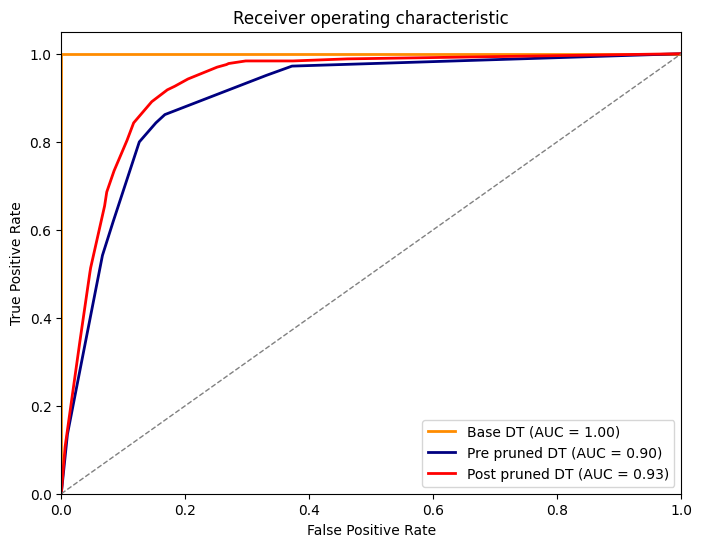

Base DT AUC: 1.00
Pre pruned DT AUC: 0.90
Post pruned DT AUC: 0.93


In [50]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, color='darkorange', lw=2, label='Base DT (AUC = %0.2f)' % auc_base)
plt.plot(fpr_pre_pruned, tpr_pre_pruned, color='navy', lw=2, label='Pre pruned DT (AUC = %0.2f)' % auc_pre_pruned)
plt.plot(fpr_post_pruned, tpr_post_pruned, color='red', lw=2, label='Post pruned DT (AUC = %0.2f)' % auc_post_pruned)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute and print AUC
print('Base DT AUC:', '%.2f' % auc_base)
print('Pre pruned DT AUC:', '%.2f' % auc_pre_pruned)
print('Post pruned DT AUC:', '%.2f' % auc_post_pruned)


In [51]:
# Print confusion matrix for the base DT
print("Confusion Matrix for Base DT:")
print(confusion_matrix(y_test, y_pred_base))

# Print classification report for the base DT
print("\nClassification Report for Base DT:")
print(classification_report(y_test, y_pred_base))


Confusion Matrix for Base DT:
[[3735    0]
 [   0  853]]

Classification Report for Base DT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3735
           1       1.00      1.00      1.00       853

    accuracy                           1.00      4588
   macro avg       1.00      1.00      1.00      4588
weighted avg       1.00      1.00      1.00      4588



In [52]:
# Print confusion matrix for the pre-pruned DT
print("Confusion Matrix for Pre-Pruned DT:")
print(confusion_matrix(y_test, y_pred_pre_pruned))

# Print classification report for the pre-pruned DT
print("\nClassification Report for Pre-Pruned DT:")
print(classification_report(y_test, y_pred_pre_pruned))


Confusion Matrix for Pre-Pruned DT:
[[3423  312]
 [ 326  527]]

Classification Report for Pre-Pruned DT:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3735
           1       0.63      0.62      0.62       853

    accuracy                           0.86      4588
   macro avg       0.77      0.77      0.77      4588
weighted avg       0.86      0.86      0.86      4588



In [53]:
# Print confusion matrix for the post-pruned DT
print("Confusion Matrix for Post-Pruned DT:")
print(confusion_matrix(y_test, y_pred_post_pruned))

# Print classification report for the post-pruned DT
print("\nClassification Report for Post-Pruned DT:")
print(classification_report(y_test, y_pred_post_pruned))


Confusion Matrix for Post-Pruned DT:
[[3417  318]
 [ 227  626]]

Classification Report for Post-Pruned DT:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3735
           1       0.66      0.73      0.70       853

    accuracy                           0.88      4588
   macro avg       0.80      0.82      0.81      4588
weighted avg       0.89      0.88      0.88      4588



In [54]:
#Import plot_tree to  extract rules and visualise the decition tree model
from sklearn.tree import plot_tree, export_text

In [55]:
from sklearn.tree import export_text

# Ensure that features list contains all feature names used during training
features = ['Age', 'Home Mortgage', 'Last Contact Duration', 
            'Number of Current Campaign Calls', 'Number of Previous Campaign Calls', 
            'RBA Cash Rate', 'Employment Variation Rate', 
            'Consumer Confidence Index', 'Sale Outcome']

# Extract the base decision rules
rules_base = export_text(base_clf, feature_names=features)

# Print the base decision rules
print("Base Decision Tree Rules:")
print(rules_base)


Base Decision Tree Rules:
|--- Sale Outcome <= 0.50
|   |--- class: 0
|--- Sale Outcome >  0.50
|   |--- class: 1



In [56]:
from sklearn.tree import export_text

# Ensure that features list contains all feature names used during training
features = ['Age', 'Home Mortgage', 'Last Contact Duration', 
            'Number of Current Campaign Calls', 'Number of Previous Campaign Calls', 
            'RBA Cash Rate', 'Employment Variation Rate', 
            'Consumer Confidence Index']

# Extract the pre_pruned decision rules
rules_pre_pruned = export_text(pre_pruned_clf, feature_names=features)

# Print the pre_pruned decision rules
print("Pre-Pruned Decision Tree Rules:")
print(rules_pre_pruned)


Pre-Pruned Decision Tree Rules:
|--- Last Contact Duration <= 378.50
|   |--- RBA Cash Rate <= 3.17
|   |   |--- Consumer Confidence Index <= 93.22
|   |   |   |--- Employment Variation Rate <= -2.35
|   |   |   |   |--- class: 0
|   |   |   |--- Employment Variation Rate >  -2.35
|   |   |   |   |--- class: 0
|   |   |--- Consumer Confidence Index >  93.22
|   |   |   |--- Last Contact Duration <= 172.50
|   |   |   |   |--- class: 0
|   |   |   |--- Last Contact Duration >  172.50
|   |   |   |   |--- class: 1
|   |--- RBA Cash Rate >  3.17
|   |   |--- class: 0
|--- Last Contact Duration >  378.50
|   |--- Number of Previous Campaign Calls <= 0.60
|   |   |--- Last Contact Duration <= 614.50
|   |   |   |--- RBA Cash Rate <= 4.05
|   |   |   |   |--- class: 1
|   |   |   |--- RBA Cash Rate >  4.05
|   |   |   |   |--- Last Contact Duration <= 485.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Last Contact Duration >  485.50
|   |   |   |   |   |--- class: 0
|   |   |--- L

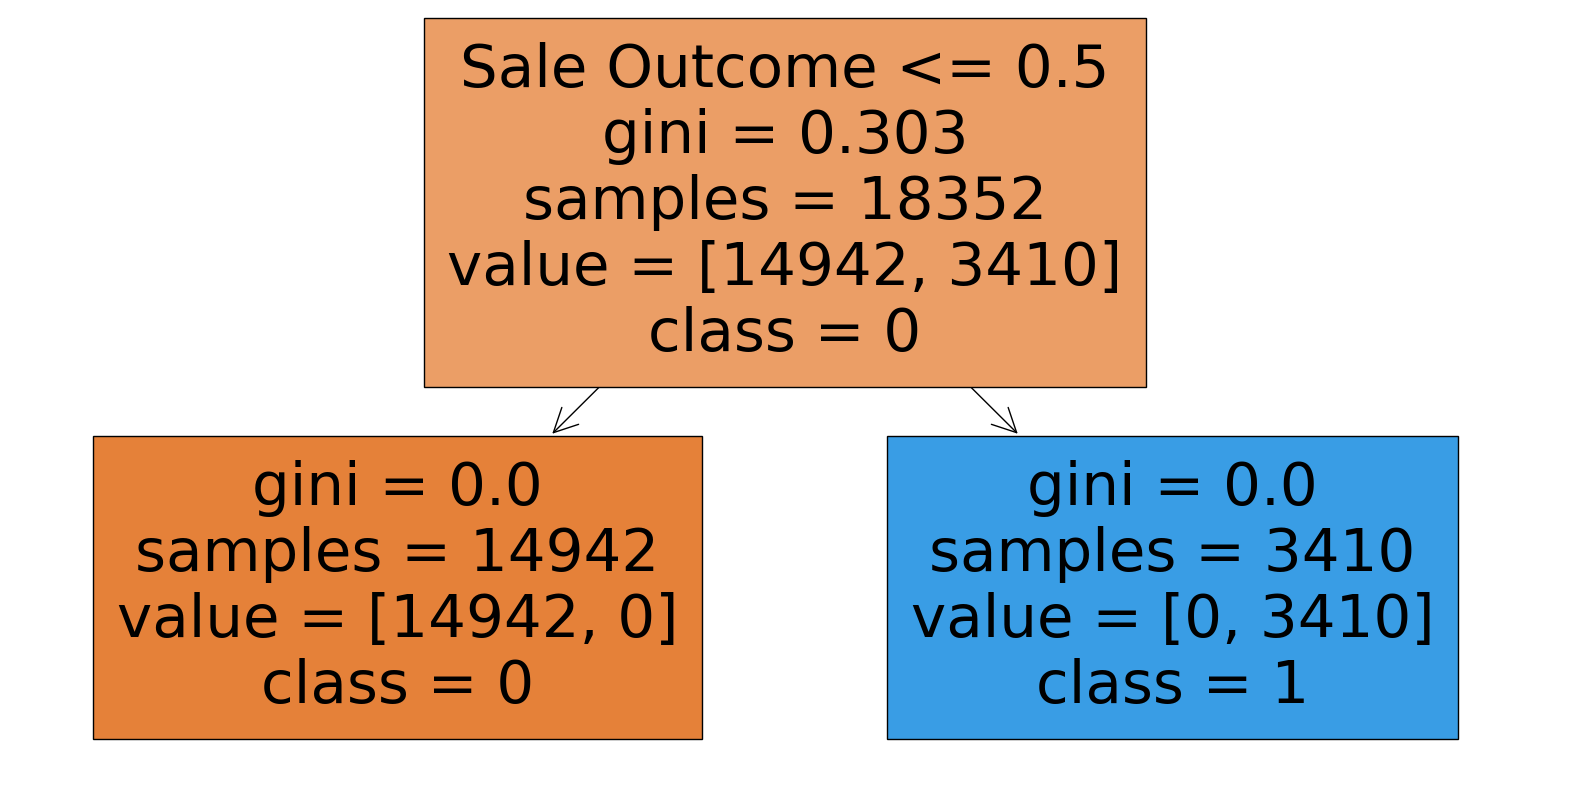

In [57]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Ensure that features list contains all feature names used during training
features = ['Age', 'Home Mortgage', 'Last Contact Duration', 
            'Number of Current Campaign Calls', 'Number of Previous Campaign Calls', 
            'RBA Cash Rate', 'Employment Variation Rate', 
            'Consumer Confidence Index', 'Sale Outcome']

# Visualize the base decision tree
plt.figure(figsize=(20, 10))
plot_tree(base_clf, filled=True, feature_names=features, class_names=['0', '1'])
plt.show()


In [58]:
pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 7.3 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=d64d49b9247d3b1e1ba103752b3641e6e6e77e76b6a19a682895179ed2f512b5
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [59]:
#Import libraries and classes; do this if we skip Case 1

import six
import sys
sys.modules['sklearn.externals.six'] = six

from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [60]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


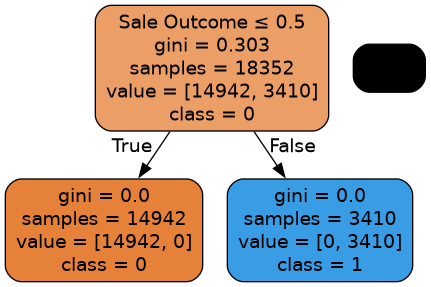

In [61]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# Ensure that features list contains all feature names used during training
features = ['Age', 'Home Mortgage', 'Last Contact Duration', 
            'Number of Current Campaign Calls', 'Number of Previous Campaign Calls', 
            'RBA Cash Rate', 'Employment Variation Rate', 
            'Consumer Confidence Index', 'Sale Outcome']

# Visualize the decision tree
dot_data = StringIO()
export_graphviz(base_clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=features, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Decision_Tree.png')
Image(graph.create_png())


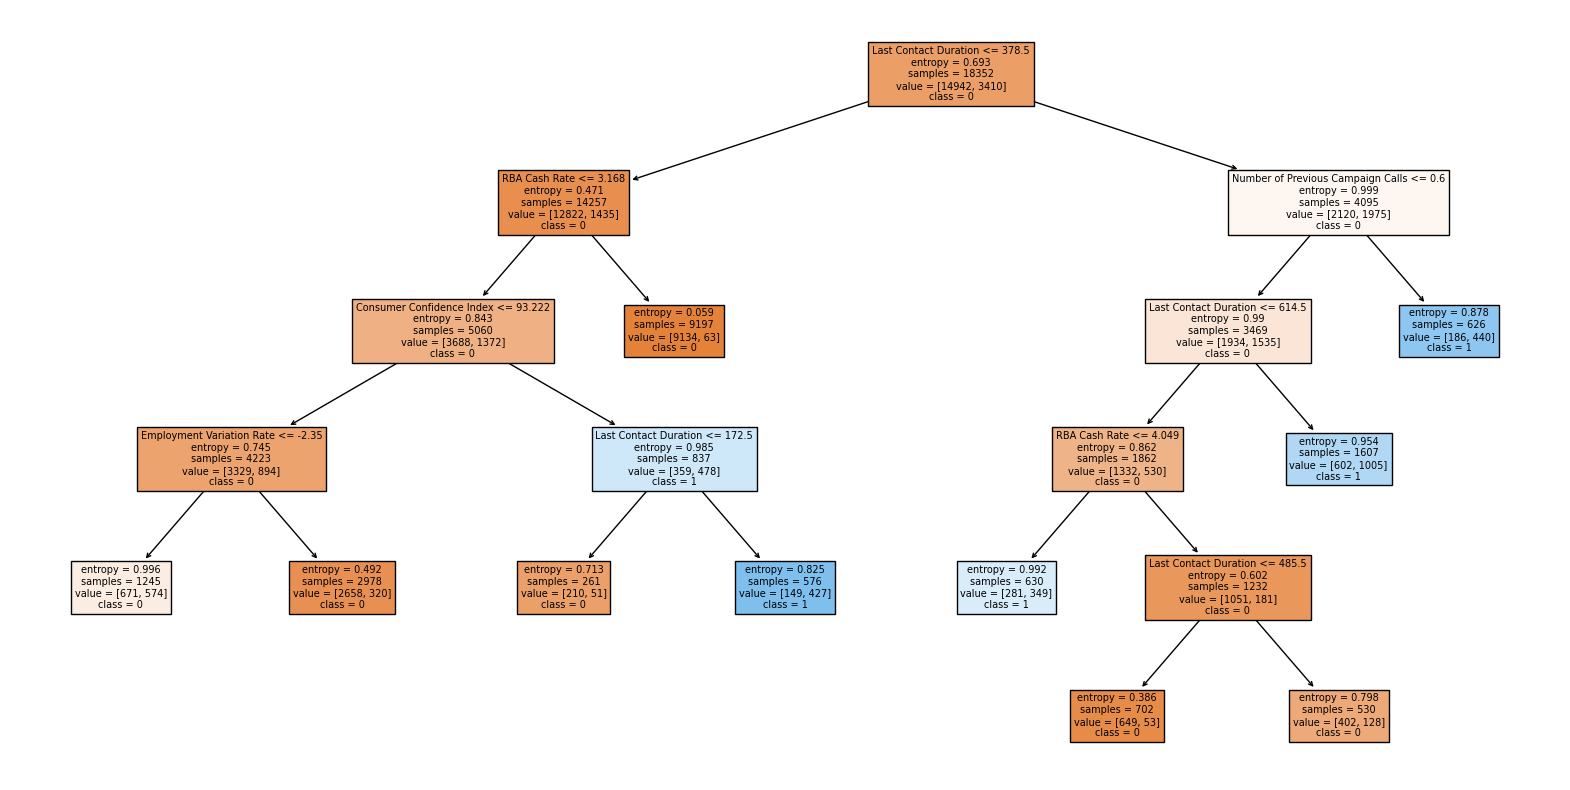

In [62]:
# visualize the base decision tree
plt.figure(figsize=(20,10))
plot_tree(pre_pruned_clf, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

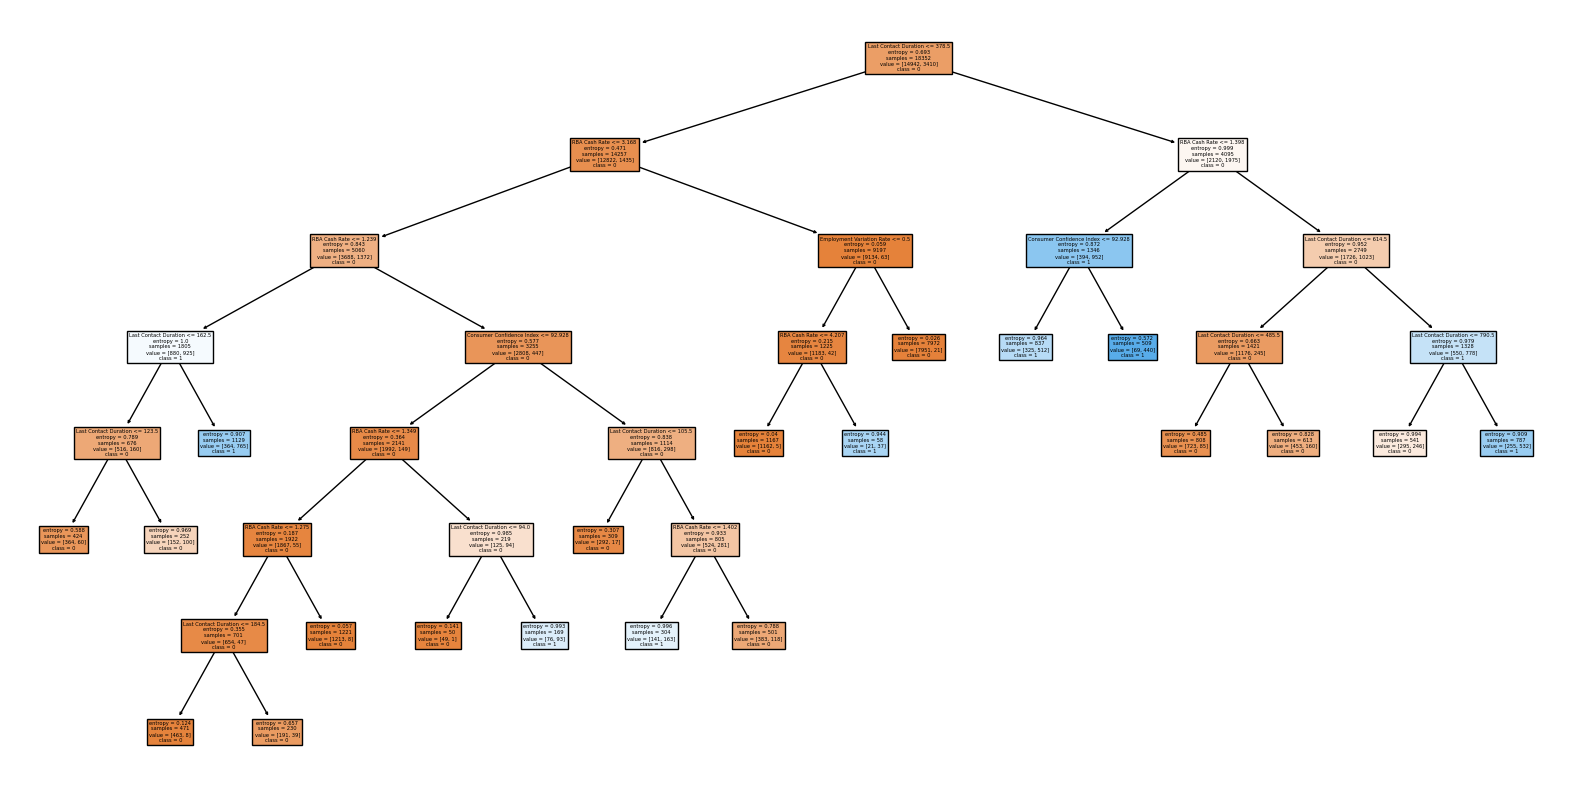

In [63]:
# visualize the base decision tree
plt.figure(figsize=(20,10))
plot_tree(post_pruned_clf, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

## **1.5 . Cross Validation**

### **K-fold cross validation**

In [64]:
#Import cross validation function
from sklearn.model_selection import cross_val_score

We use the t-distribution to calculate the confidence interval because the distribution of the cross-validation scores may not be perfectly normal. The t-distribution is similar to the normal distribution but has fatter tails, which makes it more appropriate for small sample sizes.


In [65]:
import numpy as np

def get_95ci(metric):
    n = len(metric)
    se = metric.std() / np.sqrt(n)
    t = 2.262  # t-value for 95% CI and n-1 degrees of freedom, assuming 10 folds
    ci = t * se
    return ci



In [66]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation for accuracy
accuracy = cross_val_score(post_pruned_clf, X, y, cv=10)

# Perform 10-fold cross-validation for F1 score
f1 = cross_val_score(post_pruned_clf, X, y, cv=10, scoring='f1')

# Print the mean accuracy scores and 95% CI
print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))

# Print the mean F1 scores and 95% CI
print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))


Accuracy scores: 0.881 (+/- 0.006)
F1 scores: 0.701 (+/- 0.014)


In [67]:
get_95ci(accuracy)

0.005796853662265269

In [68]:
accuracy

array([0.89886661, 0.87707062, 0.89014821, 0.88012206, 0.87750654,
       0.88709677, 0.87358326, 0.87489102, 0.87750654, 0.87183958])

In [69]:
f1

array([0.74561404, 0.70563674, 0.70560748, 0.70713525, 0.7026455 ,
       0.70996641, 0.67120181, 0.69239014, 0.6817667 , 0.69117647])

### **Leave one out and Leave P out cross validation**

In [70]:
#import leave one out
from sklearn.model_selection import LeaveOneOut
#import LeavePOut
from sklearn.model_selection import LeavePOut

In [71]:
loocv = LeaveOneOut()
accuracy = cross_val_score(pre_pruned_clf, X_test_scaled, y_test, cv=loocv, scoring='accuracy')

# Print the mean accuracy and 95%CI of the scores
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))

Accuracy: 1.000 (+/- 0.000)


In LPO, you leave out 'p' observations (for example p=2 in the below example) from the training set and use these 'p=2' observations as your validation set. This is done for each unique combination of 'p=2' observations that can be left out of the full dataset. Therefore, the number of total combinations can get very large for even moderate sizes of your dataset, making this method computationally intensive.

In [72]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

# Example using KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_kf = cross_val_score(pre_pruned_clf, X_test, y_test, cv=kf)
print("KFold Accuracy: %0.3f (+/- %0.3f)" % (accuracy_kf.mean(), get_95ci(accuracy_kf)))

# Example using StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy_skf = cross_val_score(pre_pruned_clf, X_test, y_test, cv=skf)
print("StratifiedKFold Accuracy: %0.3f (+/- %0.3f)" % (accuracy_skf.mean(), get_95ci(accuracy_skf)))


KFold Accuracy: 0.849 (+/- 0.009)
StratifiedKFold Accuracy: 0.853 (+/- 0.009)


In [73]:
lpo = LeavePOut(p=2)
accuracy = cross_val_score(pre_pruned_clf, X_test, y_test, cv=lpo)




KeyboardInterrupt



Even p=2 took us 55s to run the above, how long did it take you?

In [ ]:
# Print the mean accuracy and 95%CI of the scores
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))

## **1.6. Ensemble learning for Classification**

### **Boostrap Aggregation**

In [75]:
#Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [76]:
base_clf = DecisionTreeClassifier(max_depth=10, criterion="entropy", max_leaf_nodes=10, random_state=2023)

# Define the ensemble classifier using bagging
ensemble_classifier = BaggingClassifier(estimator=base_clf, n_estimators=100, random_state=2023)

# Train the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_baggedtrees = ensemble_classifier.predict(X_test)

In [77]:
print(confusion_matrix(y_test, y_pred_baggedtrees))
print(classification_report(y_test, y_pred_baggedtrees))

[[3465  270]
 [ 274  579]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3735
           1       0.68      0.68      0.68       853

    accuracy                           0.88      4588
   macro avg       0.80      0.80      0.80      4588
weighted avg       0.88      0.88      0.88      4588



### **Random Forest**

In [78]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
# Structure a random forest model with 100 decision trees
rf_clf = RandomForestClassifier(n_estimators=100, random_state=2023)

##Write your code to train the model on the training set
rf_clf.fit(X_train, y_train)

##Write your code to make predictions y_pred_rf=
y_pred_rf = rf_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf_clf, X, y, cv=10)
print("Cross-validation scores:", cv_scores)
print(f"Mean CV accuracy: {cv_scores.mean(): .3f}")
print(f"Std. dev. of CV accuracy: {cv_scores.std(): .3f}")

[[3469  266]
 [ 251  602]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3735
           1       0.69      0.71      0.70       853

    accuracy                           0.89      4588
   macro avg       0.81      0.82      0.82      4588
weighted avg       0.89      0.89      0.89      4588

Cross-validation scores: [0.90932868 0.88709677 0.89276373 0.88491718 0.89189189 0.88971229
 0.88404534 0.88273758 0.87925022 0.88142982]
Mean CV accuracy:  0.888
Std. dev. of CV accuracy:  0.008


### **Stacking**

In [80]:
#Import classes and functions
from sklearn.model_selection import train_test_split

from sklearn.ensemble import StackingClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report


Now that we use KNN, you might want to review how we scaled the data, let's use X_trained_scaled and X_test_scaled

In [81]:
# Define base models
estimators = [
    ('ann', MLPClassifier(hidden_layer_sizes=(32,16), max_iter=1000)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('lr', LogisticRegression(max_iter=1000))
]


# Define the meta-classifier for the stacking ensemble
meta_classifier = LogisticRegression()



In [82]:
# Build the stacking ensemble model
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_classifier)


In [83]:
# Train the stacking ensemble model on the training set
stacking_model.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('ann',
                                MLPClassifier(hidden_layer_sizes=(32, 16),
                                              max_iter=1000)),
                               ('knn', KNeighborsClassifier()),
                               ('lr', LogisticRegression(max_iter=1000))],
                   final_estimator=LogisticRegression())

In [84]:
# Evaluate the stacking ensemble model on the testing set
y_pred_stacked = stacking_model.predict(X_test_scaled)

In [85]:
print(confusion_matrix(y_test, y_pred_stacked))
print(classification_report(y_test, y_pred_stacked))

[[3735    0]
 [   0  853]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3735
           1       1.00      1.00      1.00       853

    accuracy                           1.00      4588
   macro avg       1.00      1.00      1.00      4588
weighted avg       1.00      1.00      1.00      4588



In [86]:
accuracy = accuracy_score(y_test, y_pred_stacked)
print(f'Accuracy: {accuracy: .3f}')

Accuracy:  1.000


In [87]:
# Evaluate the stacking model using 10-fold cross validation
scores = cross_val_score(stacking_model, X, y, cv=10, scoring='accuracy')
print("Accuracy: {:.3f} (+/- {:.3f})".format(np.mean(scores), np.std(scores) * 2))

Accuracy: 0.862 (+/- 0.014)
